STEP 1 - IMPORT LIBRARIES

In [272]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


STEP 2: LOAD AND INSPECT THE DATASET

In [273]:
df=pd.read_csv("data.csv")

STEP 3: DATA OVERVIEW AND INFOMATION

In [274]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())
# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

Dataset Shape: (5000, 10)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         5000 non-null   object 
 1   Year                                            5000 non-null   int64  
 2   Total Water Consumption (Billion Cubic Meters)  5000 non-null   float64
 3   Per Capita Water Use (Liters per Day)           5000 non-null   float64
 4   Water Scarcity Level                            5000 non-null   object 
 5   Agricultural Water Use (%)                      5000 non-null   float64
 6   Industrial Water Use (%)                        5000 non-null   float64
 7   Household Water Use (%)                         5000 non-null   float64
 8   Rainfall Impact (Annual Precipitation in mm)    5000 non-null   float64
 9   Gro

STEP 4: DATA CLEANING AND PROCESSING

In [275]:
# Create a copy of the dataframe to work with
df_clean = df.copy()

# Handle missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Fill missing values for numerical columns with median
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Fill missing values for categorical columns with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Duplicates removed. New shape: {df_clean.shape}")
else:
    print("No duplicates found.")

Missing values before cleaning:
Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Water Scarcity Level                              0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
dtype: int64

Missing values after cleaning:
Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Water Scarcity Level                              0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                

In [276]:
df_clean.head(10)

Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Indonesia  2022                                          895.15   
1  Indonesia  2024                                          502.89   
2      Spain  2000                                          843.39   
3     Canada  2021                                          803.34   
4     Brazil  2022                                          416.40   
5     Turkey  2018                                          237.78   
6     Turkey  2007                                          412.02   
7    Germany  2014                                          827.96   
8      Spain  2020                                          235.36   
9     France  2014                                          529.19   

   Per Capita Water Use (Liters per Day) Water Scarcity Level  \
0                                 489.73                  Low   
1                                 311.95                 High   
2                                 440.09               Medium   
3                                 478.98                 High   
4                                 353.91                 High   
5                                 297.02               Medium   
6                                  51.58                  Low   
7                                  68.01                  Low   
8                                 140.38                 High   
9                                 133.70                 High   

   Agricultural Water Use (%)  Industrial Water Use (%)  \
0                       20.78                     13.75   
1                       48.51                      8.44   
2                       25.16                     31.70   
3                       45.74                      6.13   
4                       26.58                      7.95   
5                       77.33                     36.60   
6                       51.38                     29.25   
7                       74.79                     19.68   
8                       21.34                     29.27   
9                       58.26                     31.62   

   Household Water Use (%)  Rainfall Impact (Annual Precipitation in mm)  \
0                    34.99                                       1075.28   
1                    32.88                                       2630.69   
2                    34.62                                       2860.62   
3                    18.99                                       1725.50   
4                    31.11                                        988.44   
5                    16.60                                       1451.59   
6                    10.34                                        784.99   
7                    35.99                                        587.56   
8                    25.71                                       1531.25   
9                    39.51                                       2236.38   

   Groundwater Depletion Rate (%)  
0                            3.10  
1                            1.78  
2                            4.13  
3                            0.61  
4                            0.80  
5                            2.08  
6                            3.54  
7                            3.50  
8                            1.90  
9                            3.51

In [277]:
df_clean.to_csv("cleaned_dataset.csv", index=False)

STEP 5: EXPLORATORY DATA ANALYSIS - CATEGORICAL FEATURES

Column names in the dataset:
- Country
- Year
- Total Water Consumption (Billion Cubic Meters)
- Per Capita Water Use (Liters per Day)
- Water Scarcity Level
- Agricultural Water Use (%)
- Industrial Water Use (%)
- Household Water Use (%)
- Rainfall Impact (Annual Precipitation in mm)
- Groundwater Depletion Rate (%)

Possible categorical columns: ['Country', 'Water Scarcity Level']


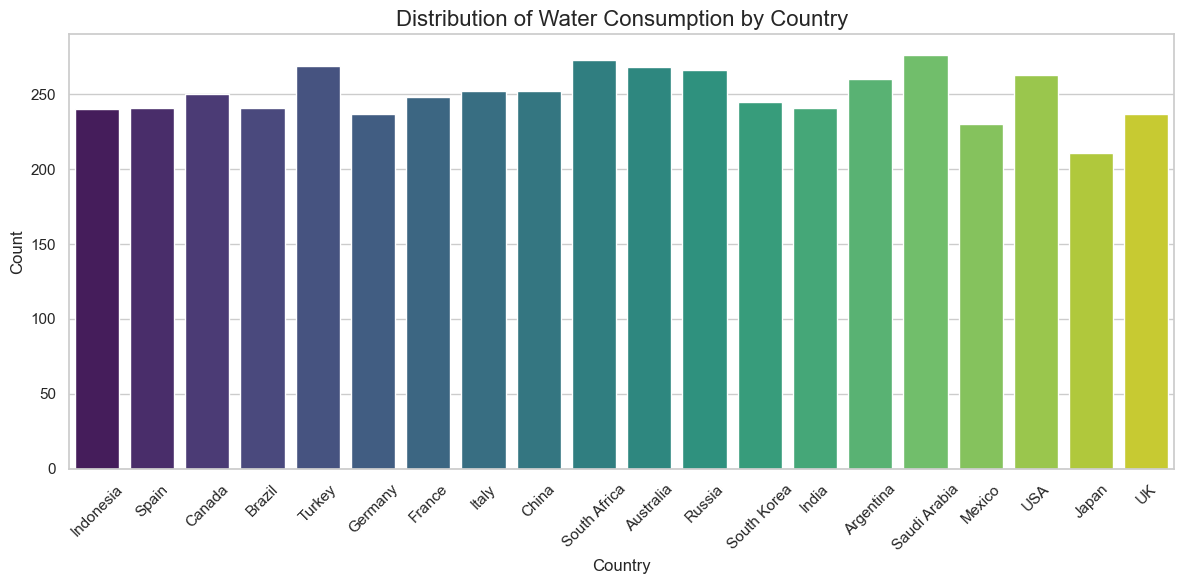

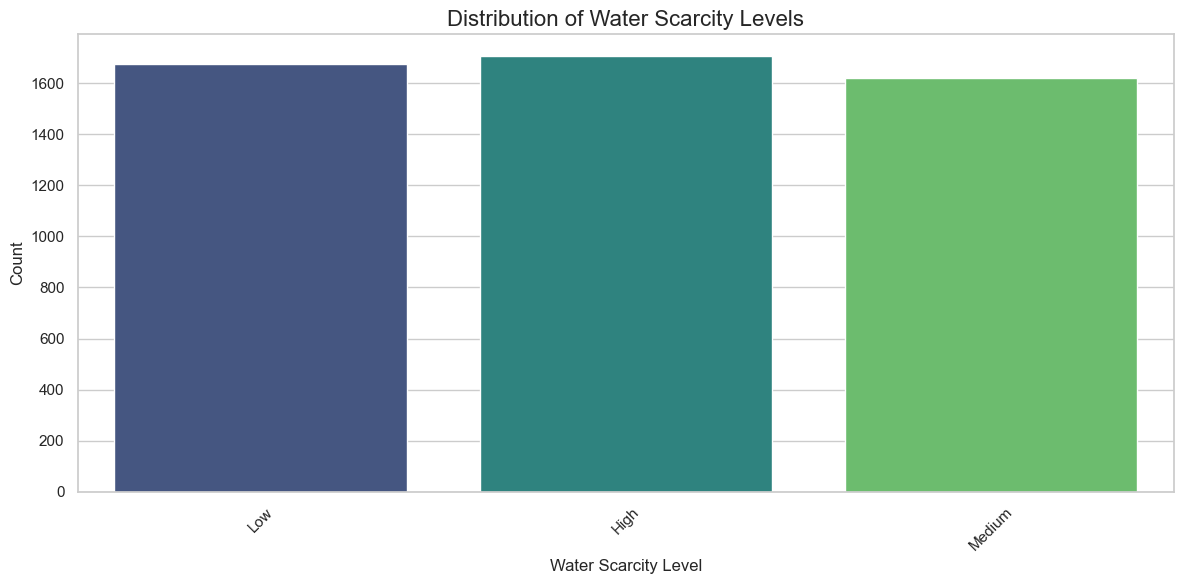


Possible numeric columns: ['Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']
Column 'Water Consumption' not found.


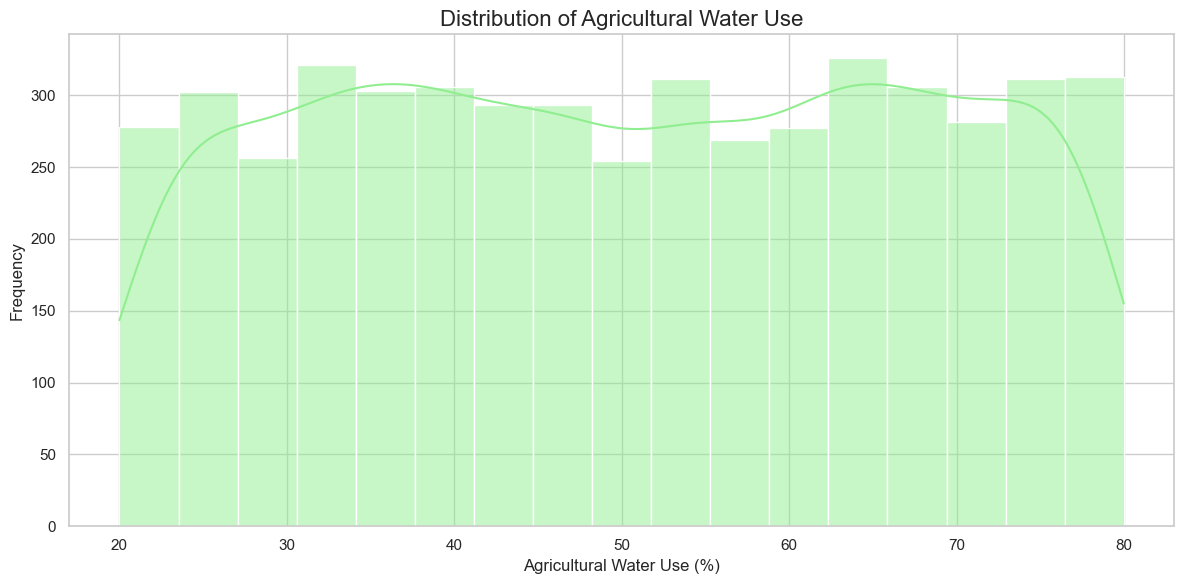

Column 'Region' not found.


In [ ]:
# First, let's check the actual column names in the dataset to make sure we're using the correct ones
print("Column names in the dataset:")
for col in df_clean.columns:
    print(f"- {col}")

# Based on the printed column names, let's analyze the relevant features for water consumption
# Let's assume we are interested in columns related to water consumption, usage, and possibly geographical info

# Identify relevant categorical columns (e.g., 'Country', 'Region', 'Water Scarcity Level')
category_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
print("\nPossible categorical columns:", category_cols)

# Check for 'Country' column for example (replace with the actual column name relevant to your dataset)
country_col = 'Country'  # Adjust based on actual column name
if country_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_clean, x=country_col, palette='viridis')
    plt.title('Distribution of Water Consumption by Country', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{country_col}' not found. Please select from available columns above.")

# Similarly, check for 'Water Scarcity Level' column if it exists
scarcity_col = 'Water Scarcity Level'  # Adjust based on actual column name
if scarcity_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_clean, x=scarcity_col, palette='viridis')
    plt.title('Distribution of Water Scarcity Levels', fontsize=16)
    plt.xlabel('Water Scarcity Level', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{scarcity_col}' not found. Please select from available columns above.")

# For numeric columns (e.g., 'Water Consumption', 'Agricultural Water Use'), visualize distributions
numeric_cols = [col for col in df_clean.columns if df_clean[col].dtype in ['int64', 'float64']]
print("\nPossible numeric columns:", numeric_cols)

# Plot distribution of 'Water Consumption' column
water_cons_col = 'Water Consumption'  # Adjust this based on your dataset's actual column name
if water_cons_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_clean[water_cons_col], kde=True, color='skyblue')
    plt.title('Distribution of Water Consumption', fontsize=16)
    plt.xlabel('Water Consumption (Billion Cubic Meters)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{water_cons_col}' not found.")

# Check if there is an 'Agricultural Water Use' column
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
if agriculture_water_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_clean[agriculture_water_col], kde=True, color='lightgreen')
    plt.title('Distribution of Agricultural Water Use', fontsize=16)
    plt.xlabel('Agricultural Water Use (%)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{agriculture_water_col}' not found.")

# If you have geographical information (e.g., 'Region'), you can plot its distribution similarly
region_col = 'Region'  # Adjust this based on your dataset's actual column name
if region_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_clean, x=region_col, palette='viridis')
    plt.title('Distribution of Regions', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{region_col}' not found.")


STEP 6: EXPLORATORY DATA ANALYSIS - NUMERICAL FEATURES

Numerical columns in the dataset:
- Year
- Total Water Consumption (Billion Cubic Meters)
- Per Capita Water Use (Liters per Day)
- Agricultural Water Use (%)
- Industrial Water Use (%)
- Household Water Use (%)
- Rainfall Impact (Annual Precipitation in mm)
- Groundwater Depletion Rate (%)
Column 'Water Consumption' not found.


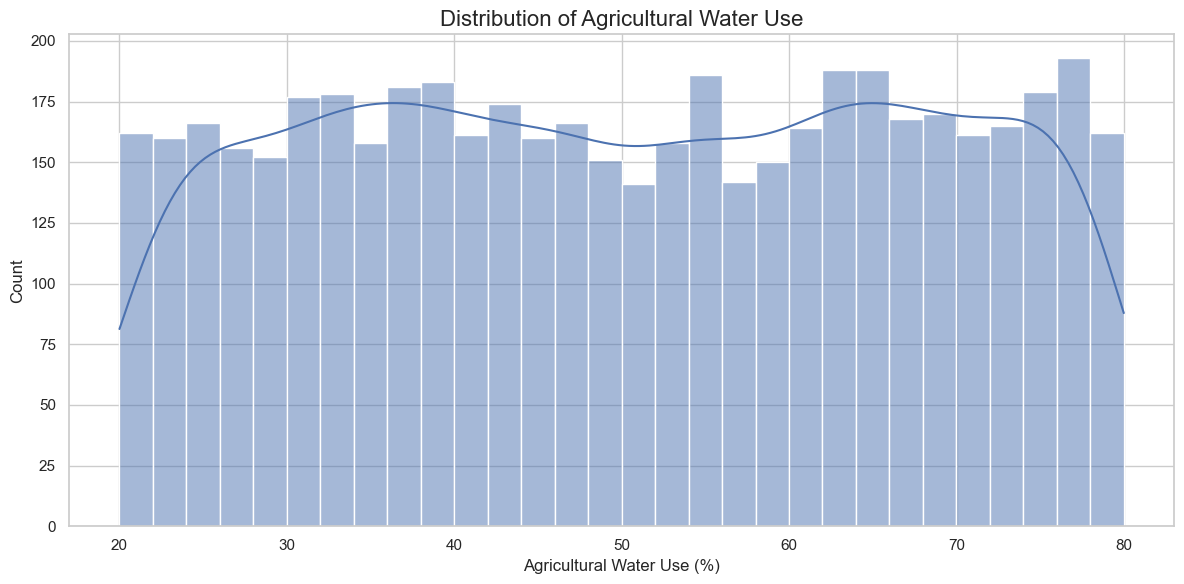

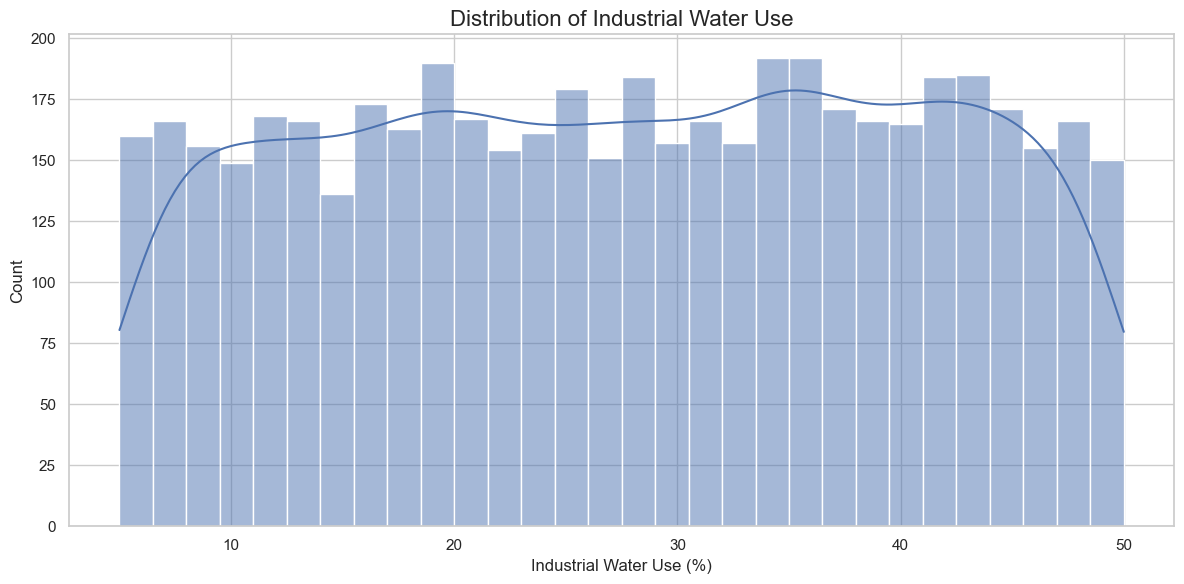

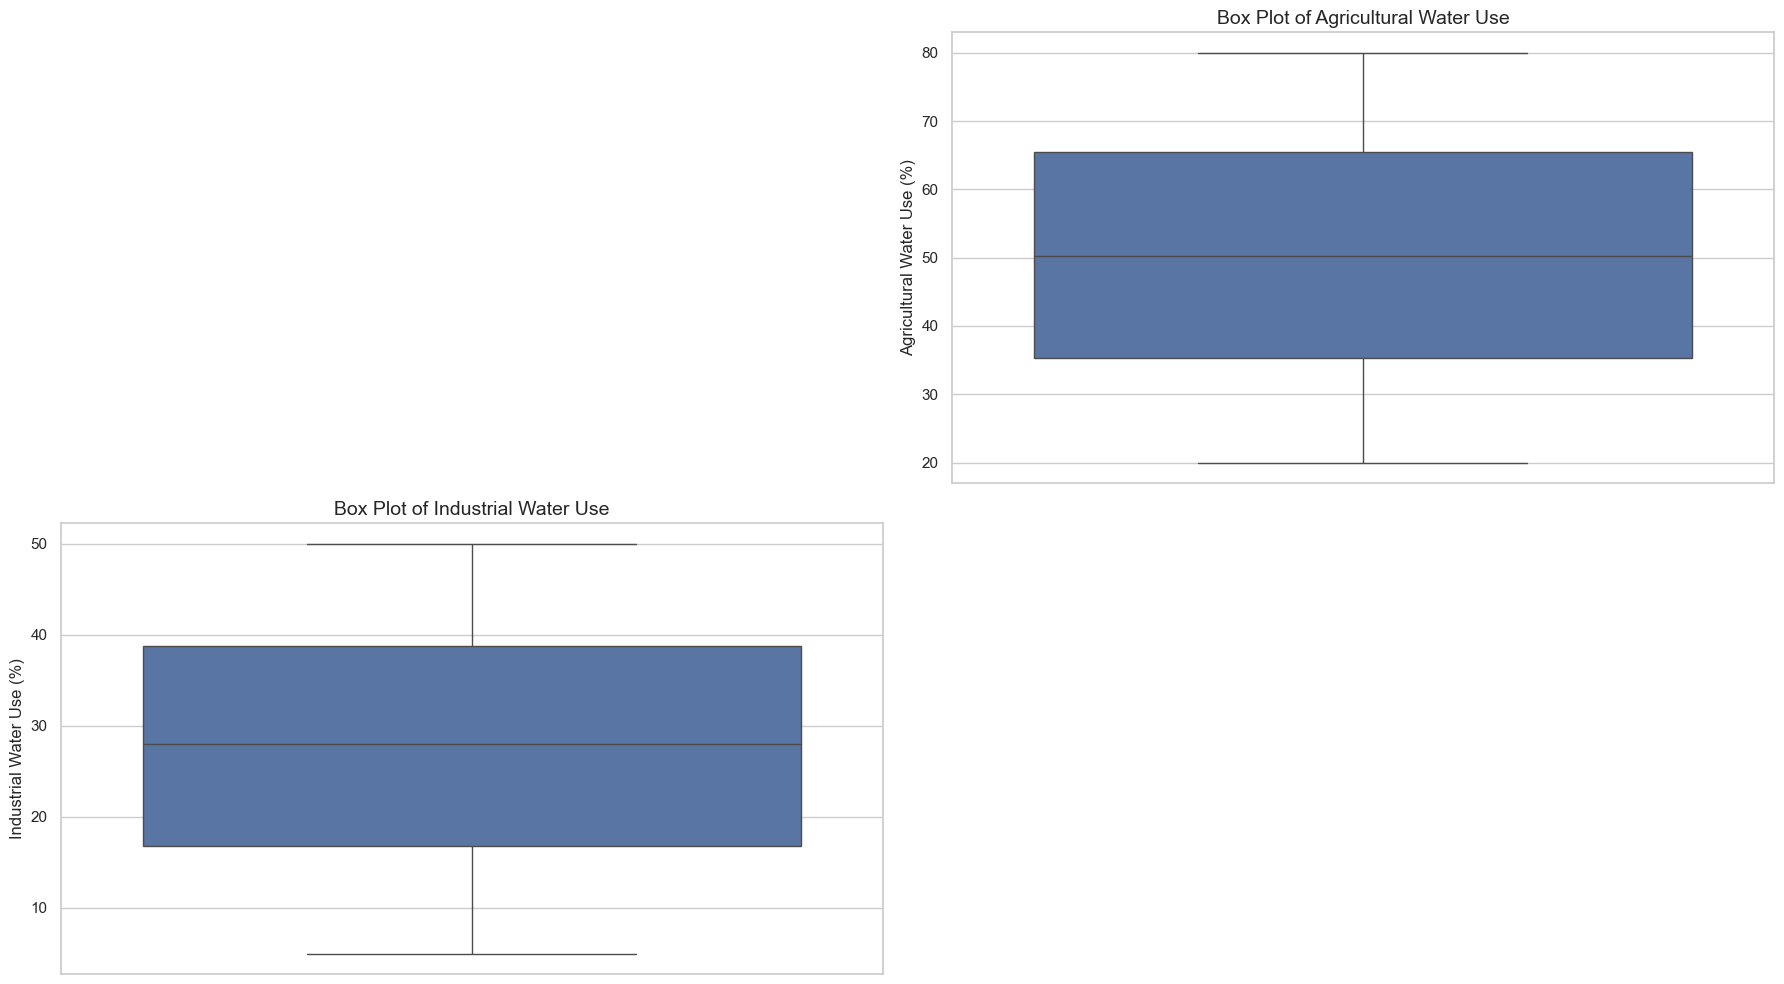


Descriptive Statistics for Numerical Features:

Agricultural Water Use (%):
count    5000.000000
mean       50.281704
std        17.397782
min        20.010000
25%        35.277500
50%        50.215000
75%        65.480000
max        79.990000
Name: Agricultural Water Use (%), dtype: float64

Industrial Water Use (%):
count    5000.000000
mean       27.753878
std        12.873524
min         5.000000
25%        16.787500
50%        27.980000
75%        38.822500
max        50.000000
Name: Industrial Water Use (%), dtype: float64


In [279]:
# First, let's verify the numerical columns in the dataset
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns in the dataset:")
for col in numeric_cols:
    print(f"- {col}")

# Analyze numerical features
# Check for Water Consumption column
water_cons_col = 'Water Consumption'  # Adjust this based on your dataset's actual column name
if water_cons_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_clean, x=water_cons_col, bins=20, kde=True)
    plt.title('Distribution of Water Consumption', fontsize=16)
    plt.xlabel('Water Consumption (Billion Cubic Meters)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{water_cons_col}' not found.")

# Check for Agricultural Water Use column
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
if agriculture_water_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_clean, x=agriculture_water_col, bins=30, kde=True)
    plt.title('Distribution of Agricultural Water Use', fontsize=16)
    plt.xlabel('Agricultural Water Use (%)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{agriculture_water_col}' not found.")

# Check for Industrial Water Use column
industrial_water_col = 'Industrial Water Use (%)'  # Adjust if needed
if industrial_water_col in df_clean.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_clean, x=industrial_water_col, bins=30, kde=True)
    plt.title('Distribution of Industrial Water Use', fontsize=16)
    plt.xlabel('Industrial Water Use (%)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{industrial_water_col}' not found.")

# Box plots for numerical features
plt.figure(figsize=(18, 10))

# Box plot for Water Consumption
if water_cons_col in df_clean.columns:
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df_clean, y=water_cons_col)
    plt.title('Box Plot of Water Consumption', fontsize=14)
    plt.ylabel('Water Consumption (Billion Cubic Meters)', fontsize=12)

# Box plot for Agricultural Water Use
if agriculture_water_col in df_clean.columns:
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df_clean, y=agriculture_water_col)
    plt.title('Box Plot of Agricultural Water Use', fontsize=14)
    plt.ylabel('Agricultural Water Use (%)', fontsize=12)

# Box plot for Industrial Water Use
if industrial_water_col in df_clean.columns:
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df_clean, y=industrial_water_col)
    plt.title('Box Plot of Industrial Water Use', fontsize=14)
    plt.ylabel('Industrial Water Use (%)', fontsize=12)

plt.tight_layout()
plt.show()

# Let's also look at the descriptive statistics for these numerical features
print("\nDescriptive Statistics for Numerical Features:")
if water_cons_col in df_clean.columns:
    print(f"\n{water_cons_col}:")
    print(df_clean[water_cons_col].describe())

if agriculture_water_col in df_clean.columns:
    print(f"\n{agriculture_water_col}:")
    print(df_clean[agriculture_water_col].describe())

if industrial_water_col in df_clean.columns:
    print(f"\n{industrial_water_col}:")
    print(df_clean[industrial_water_col].describe())


STEP 7 - RELATIONSHIP ANALYSIS

Available columns:
['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']
Either 'Water Scarcity Level' or 'Water Consumption' column not found.


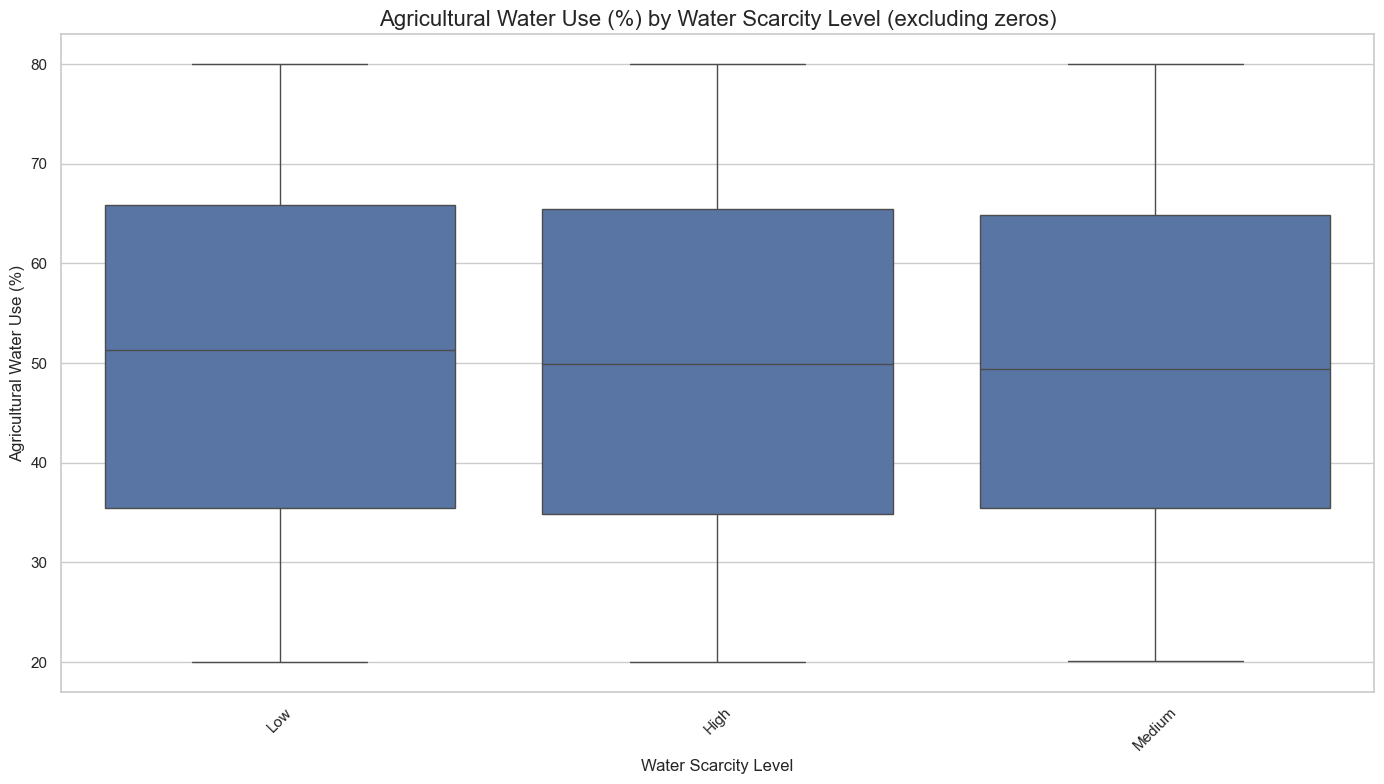

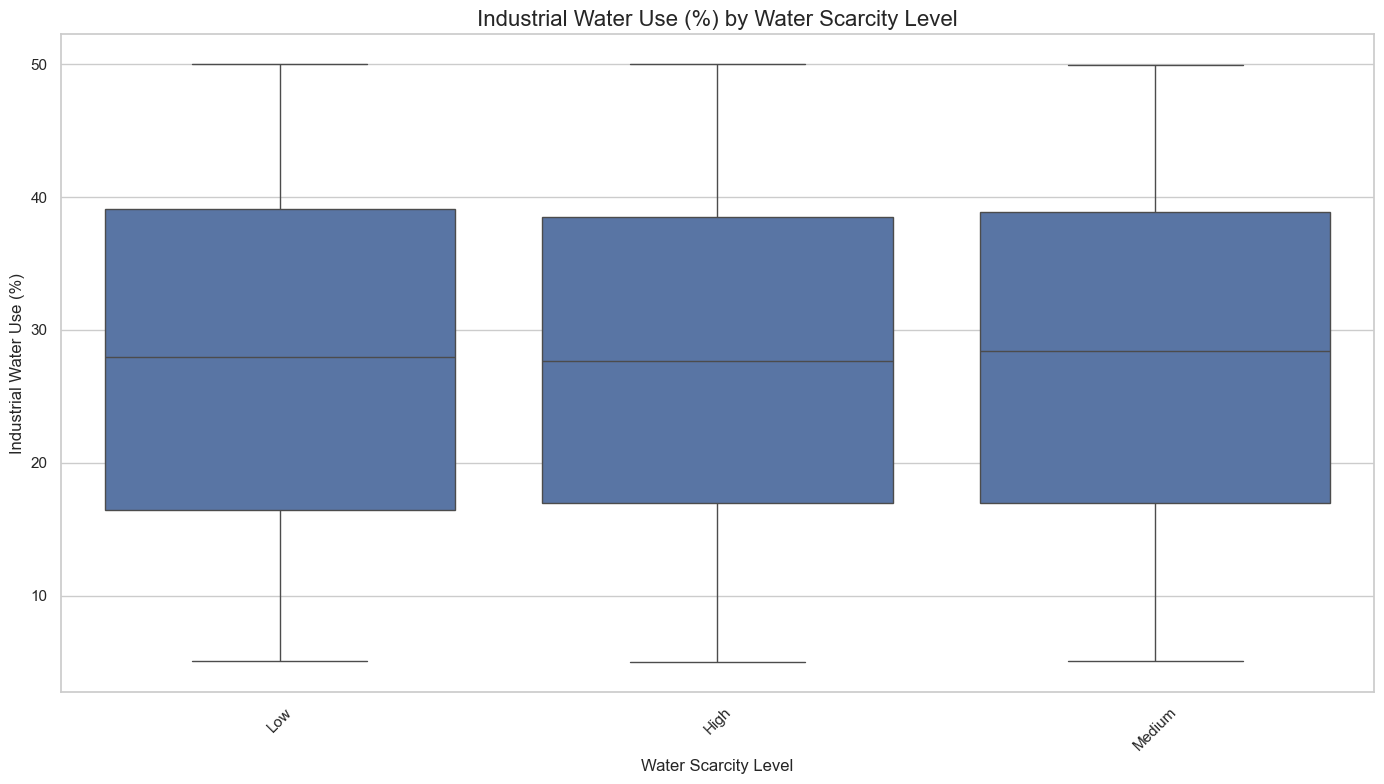

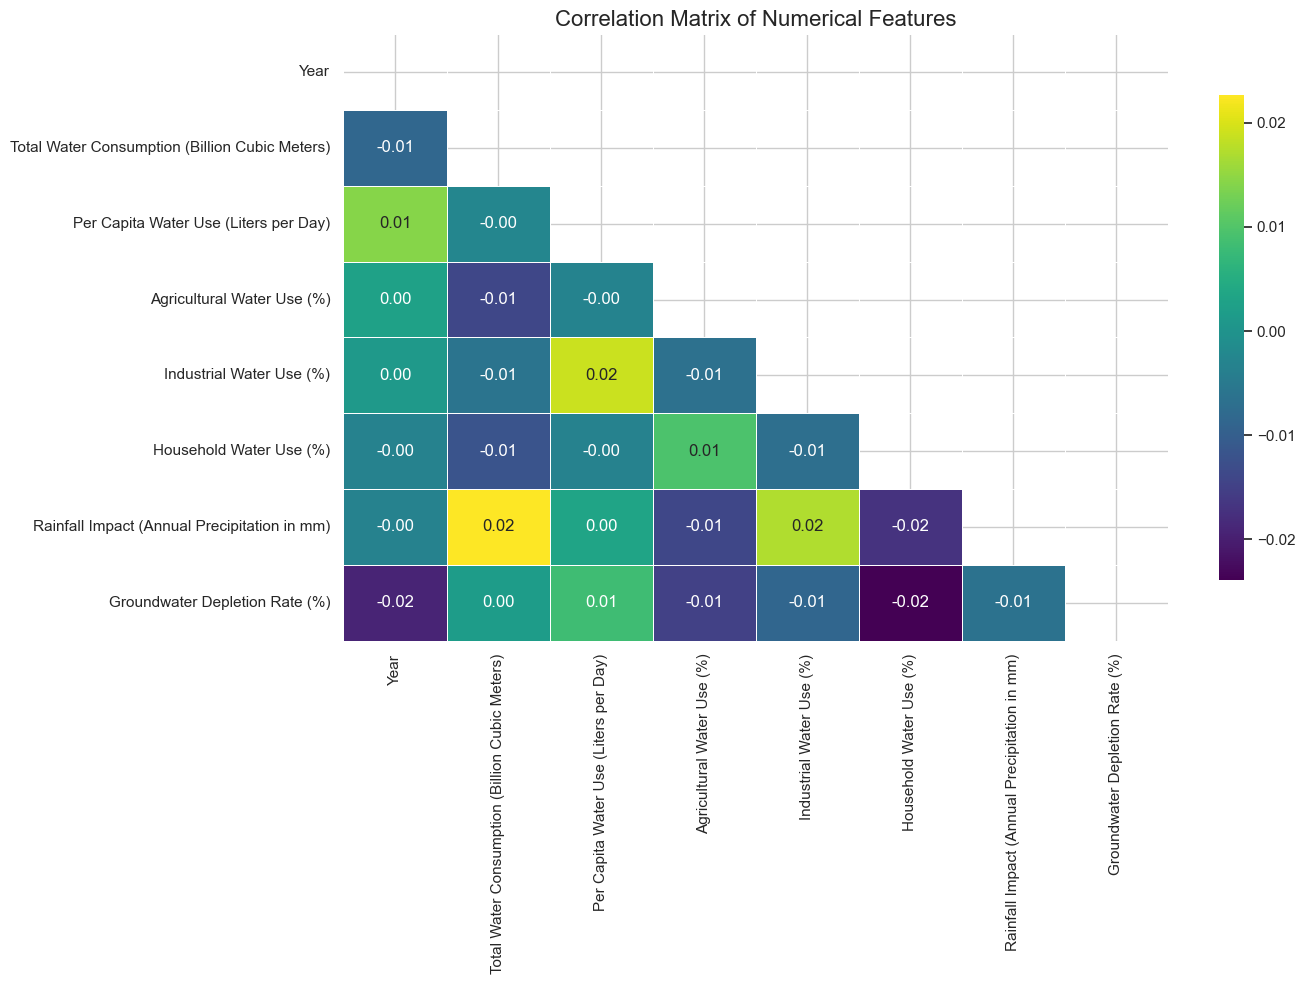


Top 5 Correlations:
1. Household Water Use (%) <-> Groundwater Depletion Rate (%): -0.0239
2. Total Water Consumption (Billion Cubic Meters) <-> Rainfall Impact (Annual Precipitation in mm): 0.0227
3. Year <-> Groundwater Depletion Rate (%): -0.0193
4. Per Capita Water Use (Liters per Day) <-> Industrial Water Use (%): 0.0189
5. Industrial Water Use (%) <-> Rainfall Impact (Annual Precipitation in mm): 0.0171


In [280]:
# First, define the key column names based on what's available in the dataset
# Use the column names we confirmed in previous steps
water_cons_col = 'Water Consumption'  # Adjust if needed
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
industrial_water_col = 'Industrial Water Use (%)'  # Adjust if needed
scarcity_level_col = 'Water Scarcity Level'  # Adjust if needed

# Print available columns for reference
print("Available columns:")
print(df_clean.columns.tolist())

# Water Consumption by Water Scarcity Level
if scarcity_level_col in df_clean.columns and water_cons_col in df_clean.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_clean, x=scarcity_level_col, y=water_cons_col)
    plt.title(f'{water_cons_col} by {scarcity_level_col}', fontsize=16)
    plt.xlabel('Water Scarcity Level', fontsize=12)
    plt.ylabel('Water Consumption (Billion Cubic Meters)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Either '{scarcity_level_col}' or '{water_cons_col}' column not found.")

# Agricultural Water Use by Water Scarcity Level (excluding zeros)
if scarcity_level_col in df_clean.columns and agriculture_water_col in df_clean.columns:
    # Check if there are any non-zero agricultural water use values
    if (df_clean[agriculture_water_col] > 0).any():
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=df_clean[df_clean[agriculture_water_col] > 0], x=scarcity_level_col, y=agriculture_water_col)
        plt.title(f'{agriculture_water_col} by {scarcity_level_col} (excluding zeros)', fontsize=16)
        plt.xlabel('Water Scarcity Level', fontsize=12)
        plt.ylabel('Agricultural Water Use (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("All Agricultural Water Use values are zero or negative.")
else:
    print(f"Either '{scarcity_level_col}' or '{agriculture_water_col}' column not found.")

# Industrial Water Use vs Water Scarcity Level
if scarcity_level_col in df_clean.columns and industrial_water_col in df_clean.columns:
    plt.figure(figsize=(14, 8))
    
    # Check if we have a manageable number of water scarcity levels
    scarcity_counts = df_clean[scarcity_level_col].value_counts()
    if len(scarcity_counts) > 10:
        # For large number of scarcity levels, create a line plot of average industrial water use by scarcity level
        scarcity_range = df_clean.groupby(scarcity_level_col)[industrial_water_col].mean().reset_index()
        sns.lineplot(data=scarcity_range, x=scarcity_level_col, y=industrial_water_col, marker='o')
        plt.title(f'Average {industrial_water_col} by {scarcity_level_col}', fontsize=16)
    else:
        # For fewer levels, use boxplot
        sns.boxplot(data=df_clean, x=scarcity_level_col, y=industrial_water_col)
        plt.title(f'{industrial_water_col} by {scarcity_level_col}', fontsize=16)
    
    plt.xlabel('Water Scarcity Level', fontsize=12)
    plt.ylabel('Industrial Water Use (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Either '{scarcity_level_col}' or '{industrial_water_col}' column not found.")

# Correlation between numerical features
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
if not numeric_df.empty:
    plt.figure(figsize=(14, 10))
    correlation_matrix = numeric_df.corr()
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Calculate the number of variables to see if the correlation matrix is manageable
    num_vars = correlation_matrix.shape[0]
    
    if num_vars <= 20:  # Only show annotations for smaller matrices
        sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='viridis', 
                    linewidths=0.5, cbar_kws={'shrink': .8})
    else:
        # For larger matrices, don't show annotations
        sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='viridis', 
                    linewidths=0.5, cbar_kws={'shrink': .8})
    
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print top 5 correlations
    print("\nTop 5 Correlations:")
    # Convert correlation matrix to a long format
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], 
                              correlation_matrix.iloc[i, j]))
    
    # Sort by absolute correlation value
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Print top 5 correlations
    for i, (var1, var2, corr) in enumerate(corr_pairs[:5]):
        print(f"{i+1}. {var1} <-> {var2}: {corr:.4f}")
else:
    print("No numerical features found for correlation analysis.")


STEP 8 - GEOGRAPHICAL ANALYSIS

Available columns:
['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']


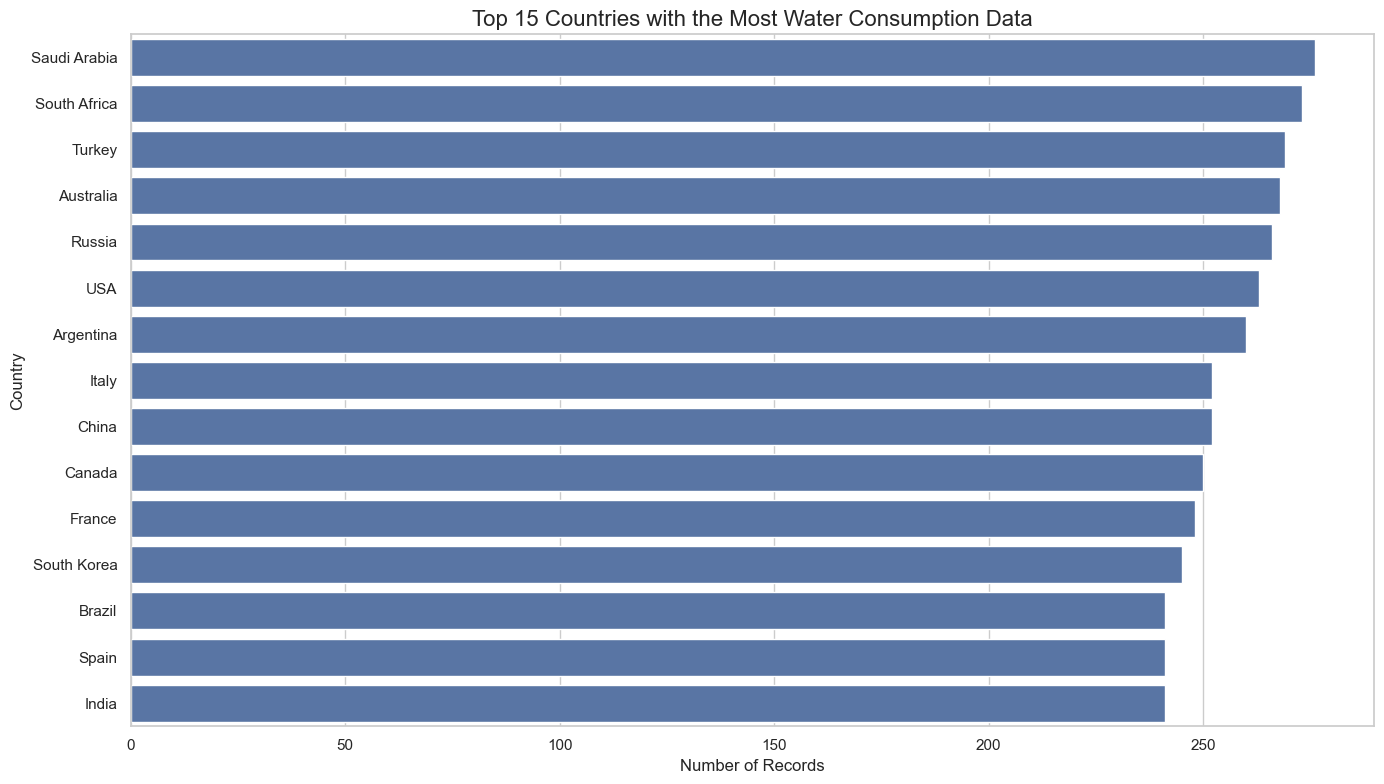

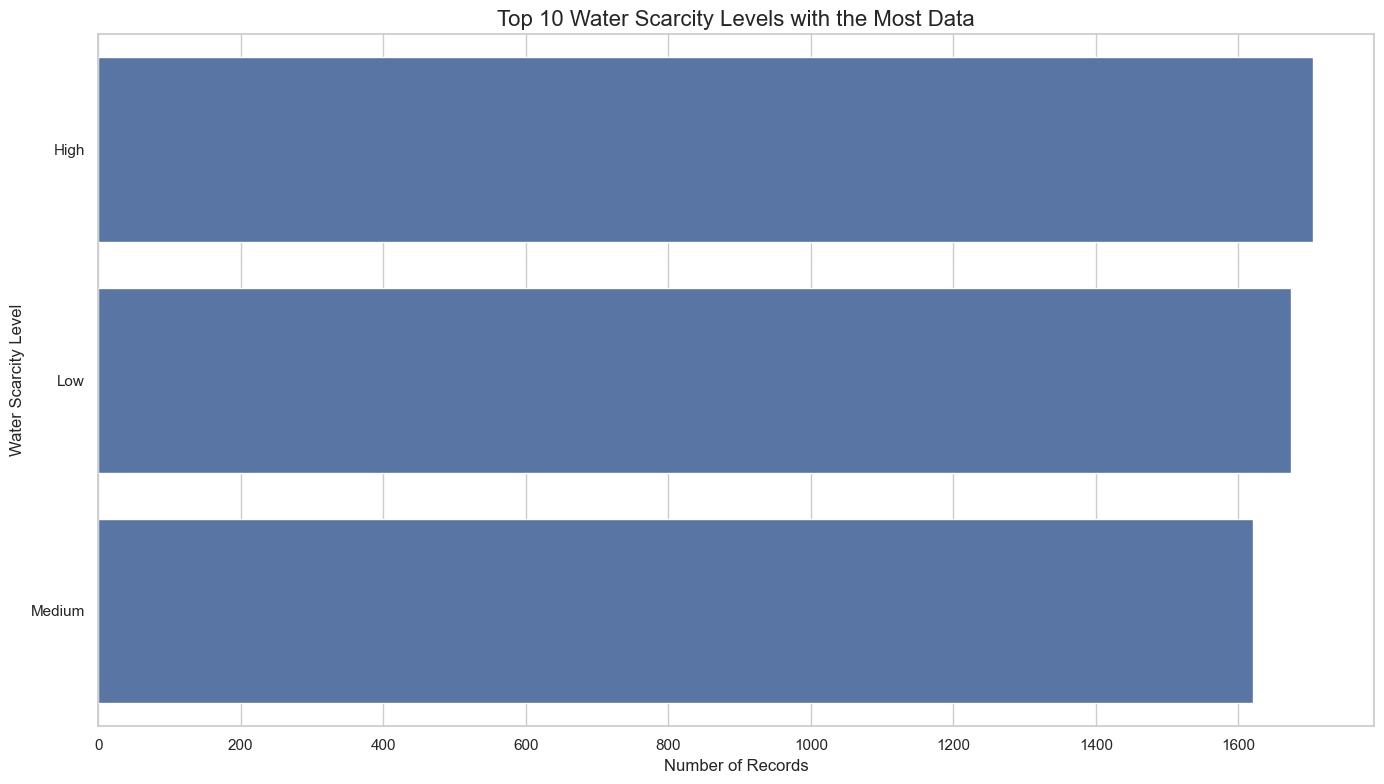

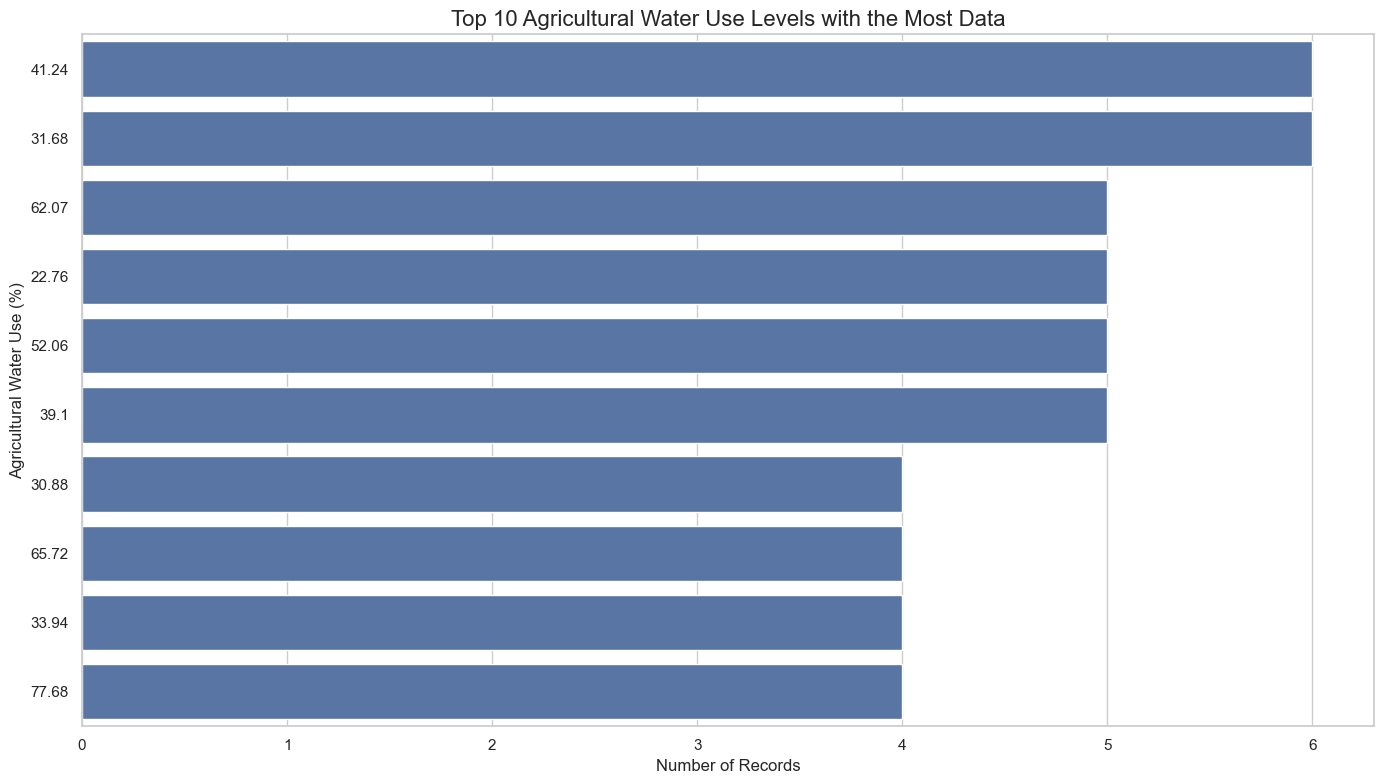

In [281]:
# Define the available column names based on what's in the dataset
country_col = 'Country'  # Adjust if needed
scarcity_level_col = 'Water Scarcity Level'  # Adjust if needed

# Print available columns for reference
print("Available columns:")
print(df_clean.columns.tolist())

# Analyze geographical distribution of water consumption by Country
if country_col in df_clean.columns:
    # Top 15 countries with the most records
    plt.figure(figsize=(14, 8))
    top_countries = df_clean[country_col].value_counts().head(15)
    
    # Check if there are any countries
    if not top_countries.empty:
        sns.barplot(x=top_countries.values, y=top_countries.index)
        plt.title('Top 15 Countries with the Most Water Consumption Data', fontsize=16)
        plt.xlabel('Number of Records', fontsize=12)
        plt.ylabel('Country', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No country data available.")
else:
    print(f"Column '{country_col}' not found.")

# Analyze water consumption distribution by Water Scarcity Level
if scarcity_level_col in df_clean.columns:
    # Top 10 water scarcity levels with the most records
    plt.figure(figsize=(14, 8))
    top_scarcity_levels = df_clean[scarcity_level_col].value_counts().head(10)
    
    # Check if there are any scarcity levels
    if not top_scarcity_levels.empty:
        sns.barplot(x=top_scarcity_levels.values, y=top_scarcity_levels.index)
        plt.title('Top 10 Water Scarcity Levels with the Most Data', fontsize=16)
        plt.xlabel('Number of Records', fontsize=12)
        plt.ylabel('Water Scarcity Level', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No water scarcity level data available.")
else:
    print(f"Column '{scarcity_level_col}' not found.")

# Additional geographical analysis - If any other available column can be used for grouping (e.g., 'Agricultural Water Use')
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
if agriculture_water_col in df_clean.columns:
    # Top 10 agricultural water usage levels with the most records
    plt.figure(figsize=(14, 8))
    top_agriculture_water = df_clean[agriculture_water_col].value_counts().head(10)
    
    # Check if there are any agricultural water use levels
    if not top_agriculture_water.empty:
        sns.barplot(x=top_agriculture_water.values, y=top_agriculture_water.index.astype(str))
        plt.title('Top 10 Agricultural Water Use Levels with the Most Data', fontsize=16)
        plt.xlabel('Number of Records', fontsize=12)
        plt.ylabel('Agricultural Water Use (%)', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("No agricultural water use data available.")
else:
    print(f"Column '{agriculture_water_col}' not found.")


STEP 10 - FEATURE ENGINEERING

Available columns:
['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']

Data Age statistics:
count    5000.000000
mean       12.795600
std         7.205484
min         1.000000
25%         7.000000
50%        13.000000
75%        19.000000
max        25.000000
Name: Data Age, dtype: float64


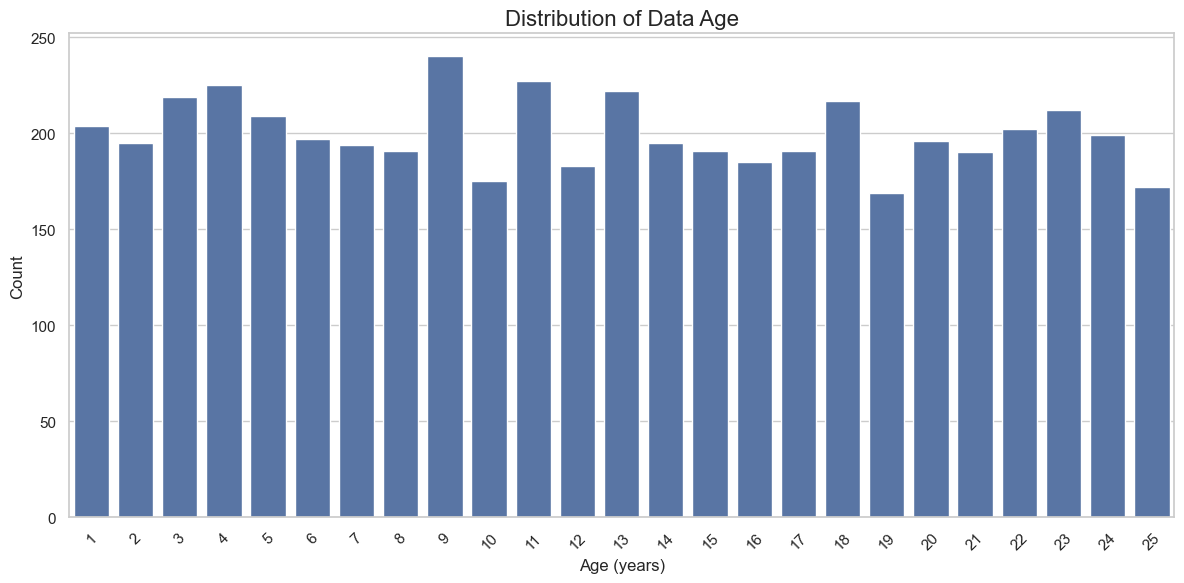


Water Consumption statistics:
count    5000.000000
mean      503.459606
std       284.457947
min        10.050000
25%       259.677500
50%       499.515000
75%       751.797500
max       999.680000
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


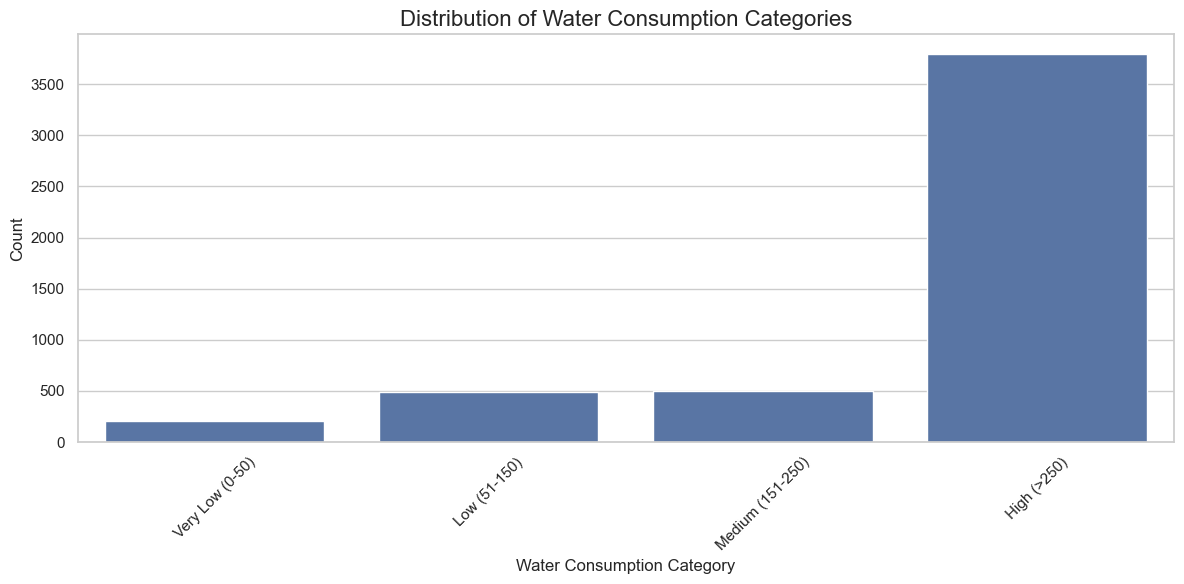


Agricultural Water Use statistics:
count    5000.000000
mean       50.281704
std        17.397782
min        20.010000
25%        35.277500
50%        50.215000
75%        65.480000
max        79.990000
Name: Agricultural Water Use (%), dtype: float64
Error creating Agricultural Water Use Category: Bin labels must be one fewer than the number of bin edges

Unique values in Water Scarcity Level:
['Low' 'High' 'Medium']


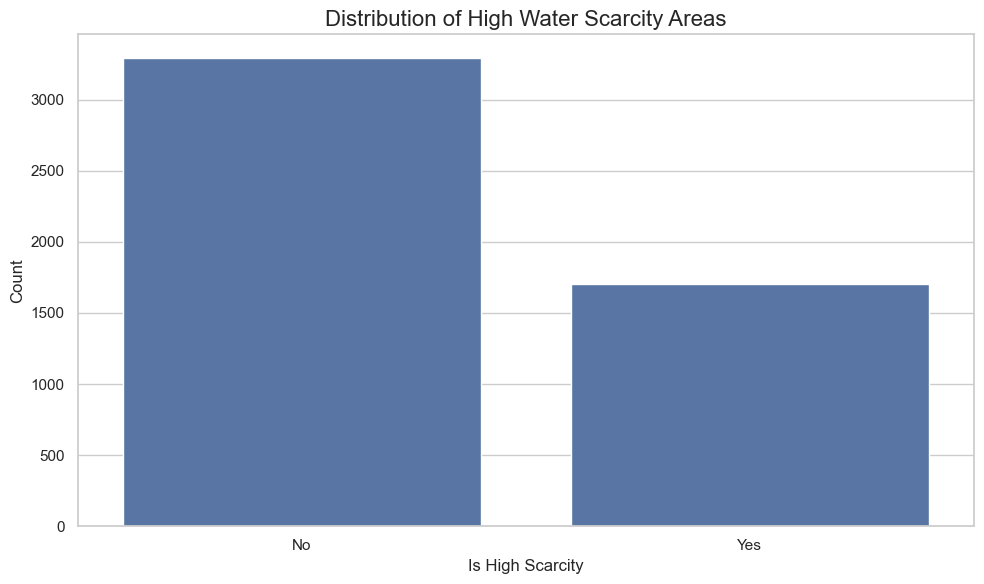


Dataset with new features:


Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Indonesia  2022                                          895.15   
1  Indonesia  2024                                          502.89   
2      Spain  2000                                          843.39   
3     Canada  2021                                          803.34   
4     Brazil  2022                                          416.40   

   Per Capita Water Use (Liters per Day) Water Scarcity Level  \
0                                 489.73                  Low   
1                                 311.95                 High   
2                                 440.09               Medium   
3                                 478.98                 High   
4                                 353.91                 High   

   Agricultural Water Use (%)  Industrial Water Use (%)  \
0                       20.78                     13.75   
1                       48.51                      8.44   
2                       25.16                     31.70   
3                       45.74                      6.13   
4                       26.58                      7.95   

   Household Water Use (%)  Rainfall Impact (Annual Precipitation in mm)  \
0                    34.99                                       1075.28   
1                    32.88                                       2630.69   
2                    34.62                                       2860.62   
3                    18.99                                       1725.50   
4                    31.11                                        988.44   

   Groundwater Depletion Rate (%)  Data Age Water Consumption Category  \
0                            3.10         3                High (>250)   
1                            1.78         1                High (>250)   
2                            4.13        25                High (>250)   
3                            0.61         4                High (>250)   
4                            0.80         3                High (>250)   

   Is High Scarcity  
0                 0  
1                 1  
2                 0  
3                 1  
4                 1


Number of new features created: 3
New features: ['Data Age', 'Water Consumption Category', 'Is High Scarcity']


In [283]:
# Create new features that might be useful for modeling
df_model = df_clean.copy()

# Print available columns for reference
print("Available columns:")
print(df_model.columns.tolist())

# Define key column names based on what's available in the dataset
year_col = 'Year'  # Replacing 'Model Year' with 'Year'
water_cons_col = 'Total Water Consumption (Billion Cubic Meters)'  # Adjust to the actual water consumption column name
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
industrial_water_col = 'Industrial Water Use (%)'  # Adjust if needed

# Calculate age of the data (if Year is available)
if year_col in df_model.columns:
    current_year = 2025  # As per your current date
    df_model['Data Age'] = current_year - df_model[year_col]
    
    print("\nData Age statistics:")
    print(df_model['Data Age'].describe())
    
    # Display distribution of Data Age
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_model, x='Data Age')
    plt.title('Distribution of Data Age', fontsize=16)
    plt.xlabel('Age (years)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{year_col}' not found. Cannot calculate Data Age.")

# Create range category (if Water Consumption is available)
if water_cons_col in df_model.columns:
    try:
        # Get water consumption statistics for better bin determination
        print("\nWater Consumption statistics:")
        print(df_model[water_cons_col].describe())
        
        # Create range categories based on the actual data distribution
        range_bins = [0, 50, 150, 250, df_model[water_cons_col].max() + 1]
        range_labels = ['Very Low (0-50)', 'Low (51-150)', 'Medium (151-250)', f'High (>250)']
        
        df_model['Water Consumption Category'] = pd.cut(
            df_model[water_cons_col], 
            bins=range_bins, 
            labels=range_labels
        )
        
        # Display distribution of Water Consumption Category
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df_model, x='Water Consumption Category')
        plt.title('Distribution of Water Consumption Categories', fontsize=16)
        plt.xlabel('Water Consumption Category', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error creating Water Consumption Category: {e}")
else:
    print(f"Column '{water_cons_col}' not found. Cannot create Water Consumption Category.")

# Create price category (if Agricultural Water Use is available)
if agriculture_water_col in df_model.columns:
    try:
        # Get Agricultural Water Use statistics for better bin determination
        print("\nAgricultural Water Use statistics:")
        print(df_model[agriculture_water_col].describe())
        
        # Create price categories based on the actual data distribution
        price_bins = [-1, 0, 10, 25, 50, df_model[agriculture_water_col].max() + 1]
        price_labels = ['Very Low (≤10%)', 'Low (11-25%)', 'Medium (26-50%)', 'High (>50%)']
        
        df_model['Agricultural Water Use Category'] = pd.cut(
            df_model[agriculture_water_col], 
            bins=price_bins, 
            labels=price_labels
        )
        
        # Display distribution of Agricultural Water Use Category
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df_model, x='Agricultural Water Use Category')
        plt.title('Distribution of Agricultural Water Use Categories', fontsize=16)
        plt.xlabel('Agricultural Water Use Category', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error creating Agricultural Water Use Category: {e}")
else:
    print(f"Column '{agriculture_water_col}' not found. Cannot create Agricultural Water Use Category.")

# Encode Water Scarcity Level for analysis (if available)
if scarcity_level_col in df_model.columns:
    try:
        # Check what values are in the column
        print(f"\nUnique values in {scarcity_level_col}:")
        print(df_model[scarcity_level_col].unique())
        
        # Create binary feature for High vs Low Water Scarcity (example, adjust based on your data)
        df_model['Is High Scarcity'] = df_model[scarcity_level_col].apply(lambda x: 1 if x == 'High' else 0)
        
        # Display distribution of High Water Scarcity
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_model, x='Is High Scarcity')
        plt.title('Distribution of High Water Scarcity Areas', fontsize=16)
        plt.xlabel('Is High Scarcity', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error creating Is High Scarcity feature: {e}")
else:
    print(f"Column '{scarcity_level_col}' not found. Cannot create Is High Scarcity feature.")

# Print the first few rows of the updated dataframe with new features
print("\nDataset with new features:")
display(df_model.head())

# Count of new features created
new_features = ['Data Age', 'Water Consumption Category', 'Agricultural Water Use Category', 'Is High Scarcity']
created_features = [feat for feat in new_features if feat in df_model.columns]
print(f"\nNumber of new features created: {len(created_features)}")
print("New features:", created_features)


STEP 11 - PREPARE DATA FOR MODELING 

Available columns:
['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']
Available numeric features: ['Year', 'Agricultural Water Use (%)', 'Industrial Water Use (%)']
Available categorical features: ['Water Scarcity Level']
Target variable 'Total Water Consumption (Billion Cubic Meters)' found. Proceeding with modeling.

Feature set shape: (5000, 4)
Target set shape: (5000,)

Missing values in features:
Year                          0
Agricultural Water Use (%)    0
Industrial Water Use (%)      0
Water Scarcity Level          0
dtype: int64

Training set shape: (4000, 4)
Testing set shape: (1000, 4)

Shape of preprocessed training data: (4000, 5)

Total features after preprocessing: 5
First 10 feature names: ['Year', 'Agricultural Water Use

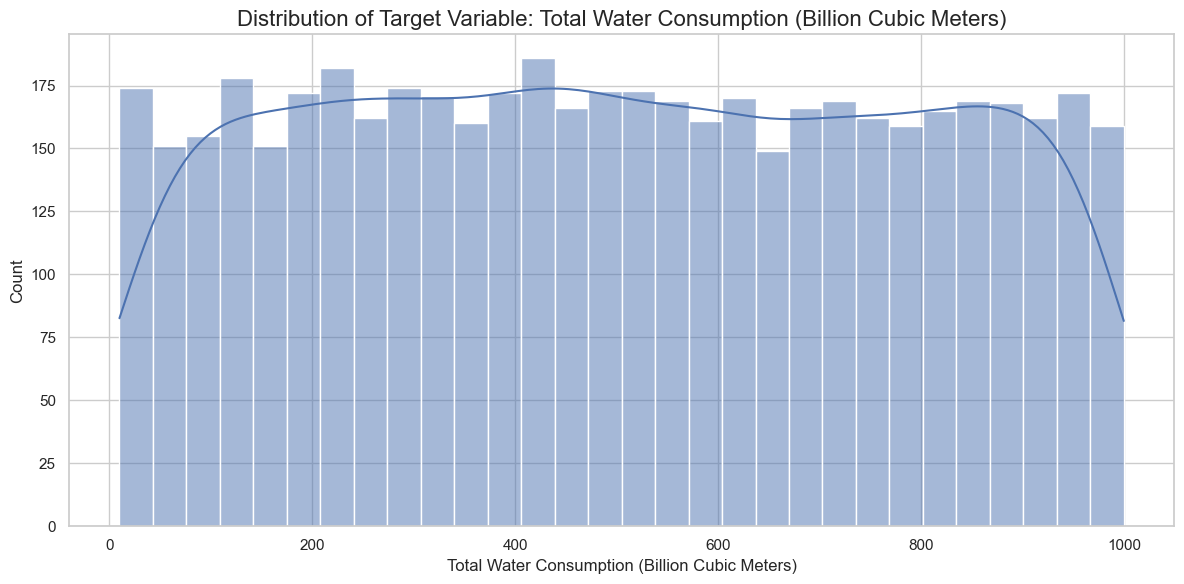

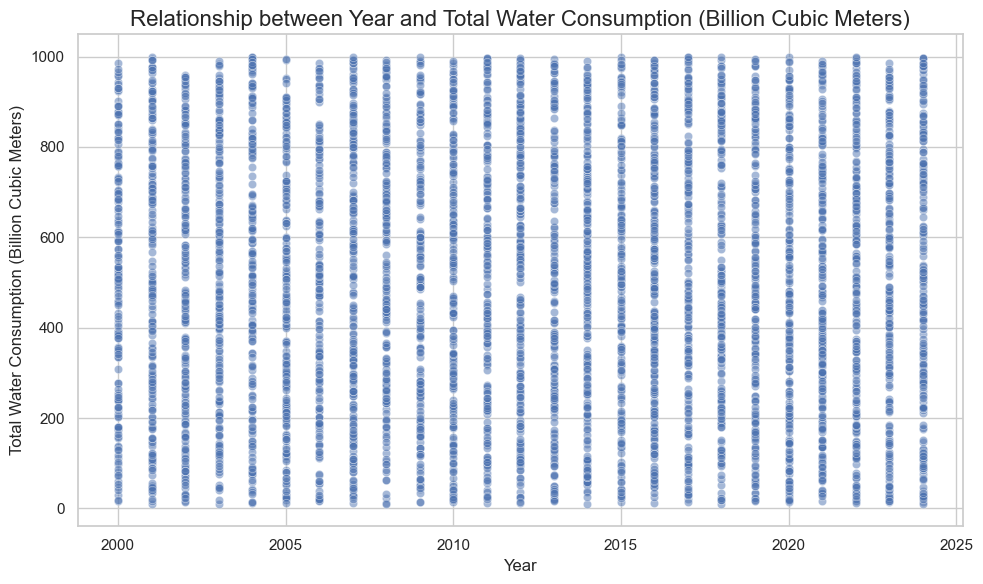

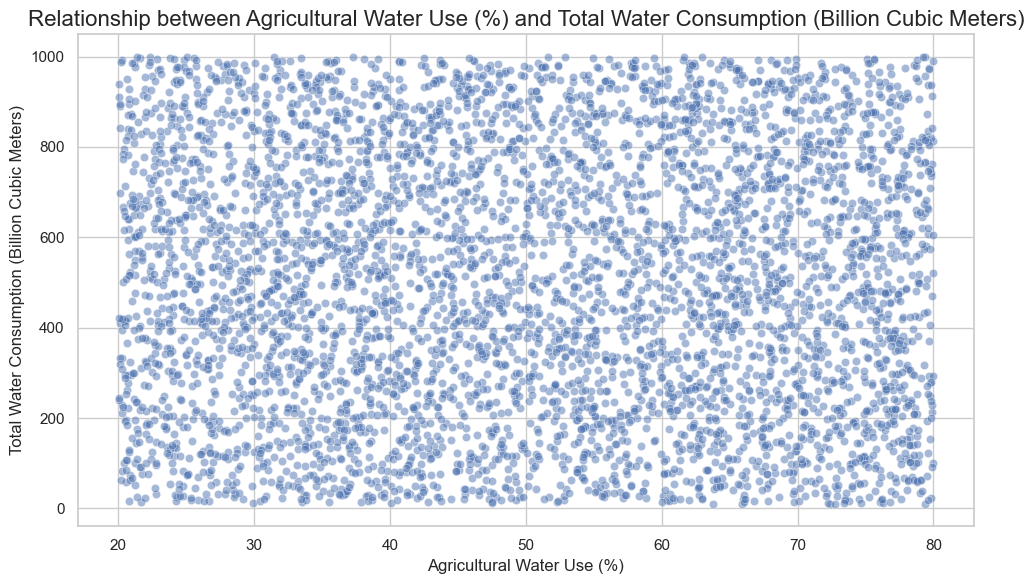

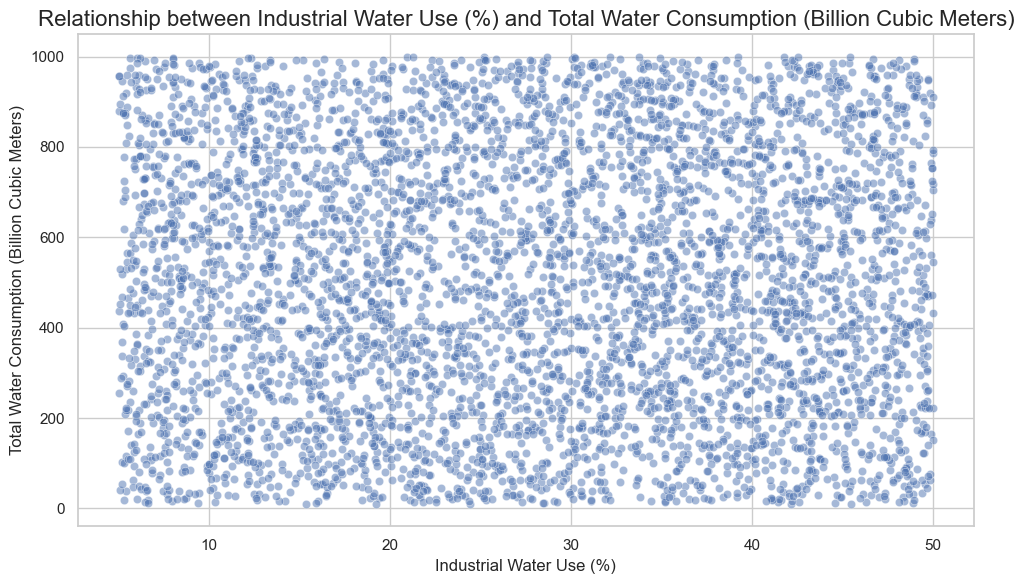

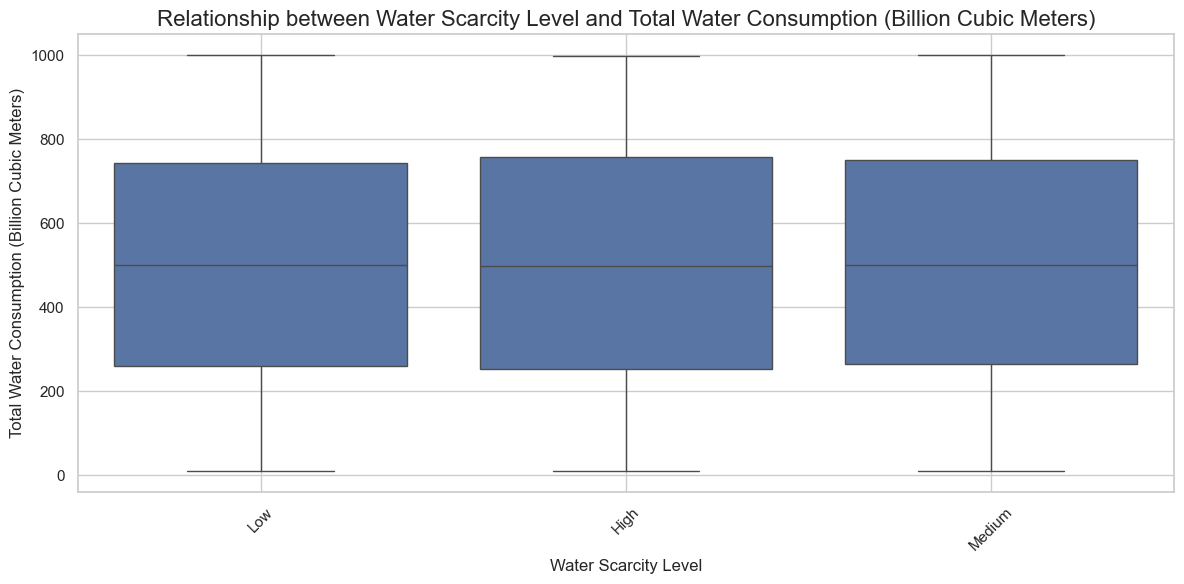

In [284]:

# Create a copy of the dataset
df_model = df_clean.copy()

# Print available columns for reference
print("Available columns:")
print(df_model.columns.tolist())

# Define key column names based on what's available in the dataset
water_cons_col = 'Total Water Consumption (Billion Cubic Meters)'  # Target variable
year_col = 'Year'  # Replacing 'Model Year' with 'Year'
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
industrial_water_col = 'Industrial Water Use (%)'  # Adjust if needed

# Define potential features for prediction
potential_numeric_features = [
    year_col, 
    agriculture_water_col,  # Water usage data
    industrial_water_col,  # Industrial water usage
    'Data Age'  # Engineered feature (if available)
]

# Categorical features (you can adjust based on the dataset)
potential_categorical_features = [
    'Water Scarcity Level',  # Categorical feature (if available)
    'Is High Scarcity'  # Engineered feature (if available)
]

# Check which features are actually available
numeric_features = [col for col in potential_numeric_features if col in df_model.columns]
categorical_features = [col for col in potential_categorical_features if col in df_model.columns]

print(f"Available numeric features: {numeric_features}")
print(f"Available categorical features: {categorical_features}")

# Check if we have the target variable
if water_cons_col not in df_model.columns:
    print(f"Target variable '{water_cons_col}' not found. Cannot proceed with modeling.")
else:
    print(f"Target variable '{water_cons_col}' found. Proceeding with modeling.")
    
    # Select features and target
    features = numeric_features + categorical_features
    
    # Check if we have enough features
    if len(features) < 2:
        print("Not enough features available for modeling. Need at least 2 features.")
    else:
        # Remove rows with missing values in the target variable
        df_modeling = df_model.dropna(subset=[water_cons_col])
        
        # Select features and target
        X = df_modeling[features]
        y = df_modeling[water_cons_col]
        
        print(f"\nFeature set shape: {X.shape}")
        print(f"Target set shape: {y.shape}")
        
        # Check for missing values in features
        missing_values = X.isnull().sum()
        print("\nMissing values in features:")
        print(missing_values)
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        print(f"\nTraining set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        # Define transformers for different feature types
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])
        
        # Create preprocessing pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )
        
        # Preview the transformed data
        try:
            X_train_processed = preprocessor.fit_transform(X_train)
            print(f"\nShape of preprocessed training data: {X_train_processed.shape}")
            
            # Get feature names after one-hot encoding
            all_feature_names = []
            
            # Add numeric feature names
            all_feature_names.extend(numeric_features)
            
            # Get categorical feature names after one-hot encoding
            if categorical_features:
                ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
                cat_features_encoded = ohe.get_feature_names_out(categorical_features)
                all_feature_names.extend(cat_features_encoded)
            
            print(f"\nTotal features after preprocessing: {len(all_feature_names)}")
            
            # Print the first few feature names
            if len(all_feature_names) > 0:
                print(f"First 10 feature names: {all_feature_names[:10]}")
                
        except Exception as e:
            print(f"Error in preprocessing: {e}")
            
        # Check target variable distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df_modeling, x=water_cons_col, bins=30, kde=True)
        plt.title(f'Distribution of Target Variable: {water_cons_col}', fontsize=16)
        plt.xlabel('Total Water Consumption (Billion Cubic Meters)', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Look at the relationship between key features and the target
        for feature in numeric_features:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df_modeling, x=feature, y=water_cons_col, alpha=0.5)
            plt.title(f'Relationship between {feature} and {water_cons_col}', fontsize=16)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel(water_cons_col, fontsize=12)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        
        for feature in categorical_features:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df_modeling, x=feature, y=water_cons_col)
            plt.title(f'Relationship between {feature} and {water_cons_col}', fontsize=16)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel(water_cons_col, fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.tight_layout()
            plt.show()


STEP 12 - MODEL BUILDING - LINEAR REGRESSION

Available columns:
['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)', 'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level', 'Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)', 'Rainfall Impact (Annual Precipitation in mm)', 'Groundwater Depletion Rate (%)']
Available numeric features: ['Year', 'Agricultural Water Use (%)', 'Industrial Water Use (%)']
Available categorical features: ['Water Scarcity Level']
Target variable 'Total Water Consumption (Billion Cubic Meters)' found. Proceeding with modeling.

Feature set shape: (5000, 4)
Target set shape: (5000,)
Training set shape: (4000, 4)
Testing set shape: (1000, 4)

Training Linear Regression model...
Model training completed.
Making predictions on test set...

Linear Regression Model Performance:
Mean Squared Error: 78934.60
Root Mean Squared Error: 280.95
Mean Absolute Error: 243.58
R² Score: -0.0004


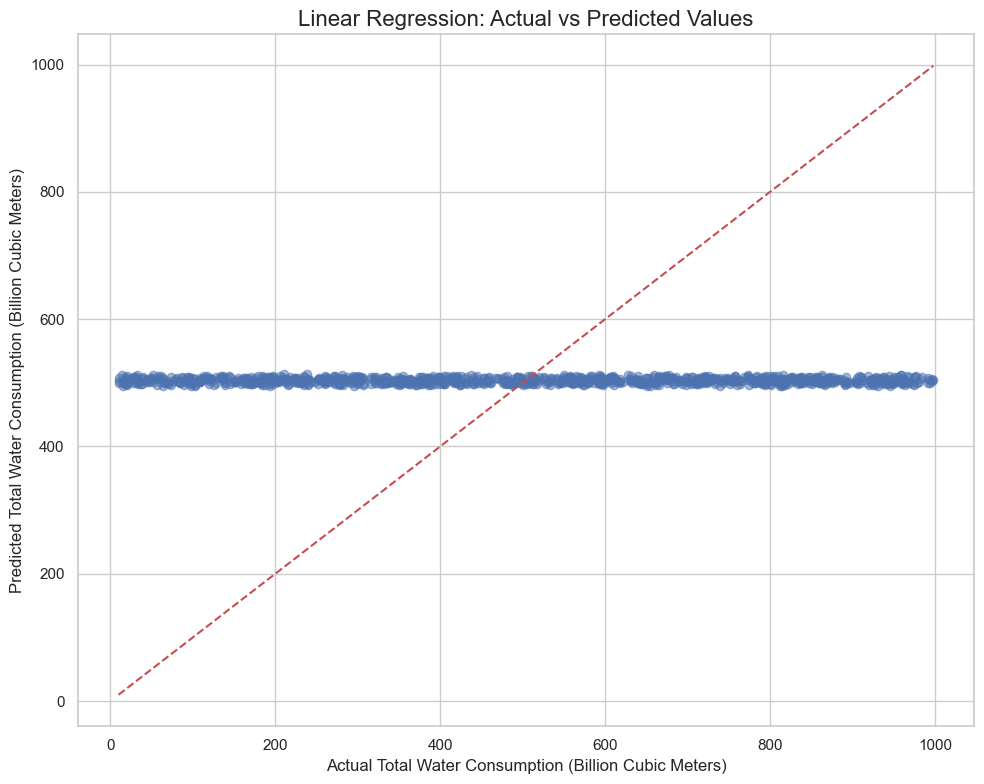

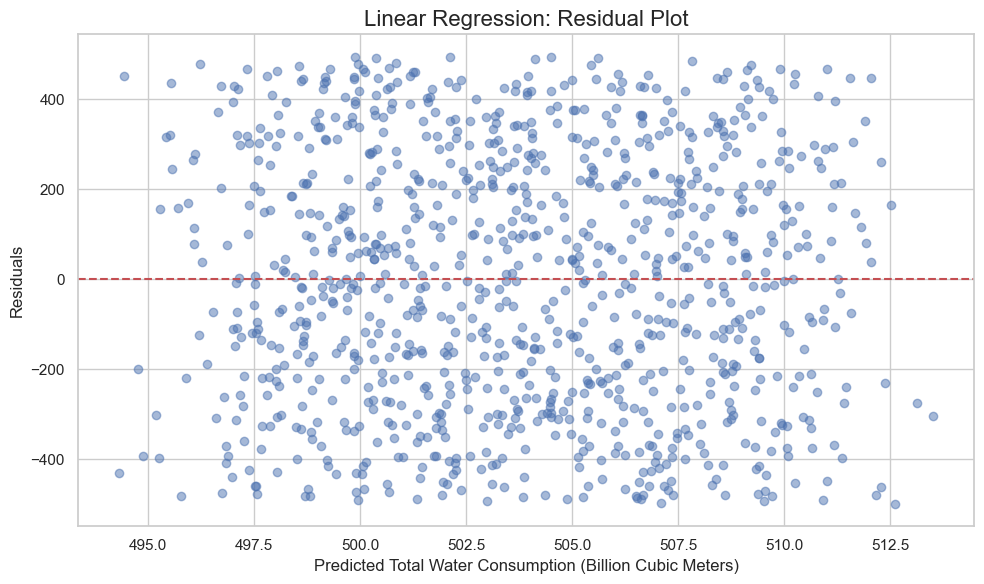

In [285]:

# Create a copy of the dataset
df_model = df_clean.copy()

# Print available columns for reference
print("Available columns:")
print(df_model.columns.tolist())

# Define key column names based on what's available in the dataset
water_cons_col = 'Total Water Consumption (Billion Cubic Meters)'  # Target variable
year_col = 'Year'  # Replacing 'Model Year' with 'Year'
agriculture_water_col = 'Agricultural Water Use (%)'  # Adjust if needed
industrial_water_col = 'Industrial Water Use (%)'  # Adjust if needed
scarcity_level_col = 'Water Scarcity Level'  # Adjust if needed

# Define potential features for prediction
potential_numeric_features = [
    year_col, 
    agriculture_water_col,  # Water usage data
    industrial_water_col,  # Industrial water usage
    'Data Age'  # Engineered feature (if available)
]

# Categorical features (you can adjust based on the dataset)
potential_categorical_features = [
    scarcity_level_col,  # Categorical feature (if available)
    'Is High Scarcity'  # Engineered feature (if available)
]

# Check which features are actually available
numeric_features = [col for col in potential_numeric_features if col in df_model.columns]
categorical_features = [col for col in potential_categorical_features if col in df_model.columns]

print(f"Available numeric features: {numeric_features}")
print(f"Available categorical features: {categorical_features}")

# Check if we have the target variable
if water_cons_col not in df_model.columns:
    print(f"Target variable '{water_cons_col}' not found. Cannot proceed with modeling.")
else:
    print(f"Target variable '{water_cons_col}' found. Proceeding with modeling.")
    
    # Select features and target
    features = numeric_features + categorical_features
    
    # Check if we have enough features
    if len(features) < 2:
        print("Not enough features available for modeling. Need at least 2 features.")
    else:
        # Remove rows with missing values in the target variable
        df_modeling = df_model.dropna(subset=[water_cons_col])
        
        # Select a subset of the data if it's very large
        if len(df_modeling) > 10000:
            df_modeling = df_modeling.sample(10000, random_state=42)
            print(f"Using a sample of 10000 rows from {len(df_model)} total rows")
        
        # Create X and y
        X = df_modeling[features]
        y = df_modeling[water_cons_col]
        
        print(f"\nFeature set shape: {X.shape}")
        print(f"Target set shape: {y.shape}")
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        # Create preprocessor
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )
        
        # Create a pipeline with preprocessing and linear regression
        from sklearn.linear_model import LinearRegression
        lr_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])
        
        # Train the model
        try:
            print("\nTraining Linear Regression model...")
            lr_pipeline.fit(X_train, y_train)
            print("Model training completed.")
            
            # Make predictions
            print("Making predictions on test set...")
            y_pred_lr = lr_pipeline.predict(X_test)
            
            # Evaluate the model
            lr_mse = mean_squared_error(y_test, y_pred_lr)
            lr_rmse = np.sqrt(lr_mse)
            lr_mae = mean_absolute_error(y_test, y_pred_lr)
            lr_r2 = r2_score(y_test, y_pred_lr)
            
            print("\nLinear Regression Model Performance:")
            print(f"Mean Squared Error: {lr_mse:.2f}")
            print(f"Root Mean Squared Error: {lr_rmse:.2f}")
            print(f"Mean Absolute Error: {lr_mae:.2f}")
            print(f"R² Score: {lr_r2:.4f}")
            
            # Visualize actual vs predicted values
            plt.figure(figsize=(10, 8))
            plt.scatter(y_test, y_pred_lr, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.title('Linear Regression: Actual vs Predicted Values', fontsize=16)
            plt.xlabel(f'Actual {water_cons_col}', fontsize=12)
            plt.ylabel(f'Predicted {water_cons_col}', fontsize=12)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Plot residuals
            residuals = y_test - y_pred_lr
            plt.figure(figsize=(10, 6))
            plt.scatter(y_pred_lr, residuals, alpha=0.5)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.title('Linear Regression: Residual Plot', fontsize=16)
            plt.xlabel(f'Predicted {water_cons_col}', fontsize=12)
            plt.ylabel('Residuals', fontsize=12)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error in Linear Regression modeling: {e}")


STEP 13 - MODEL BUILDING - RANDOM FOREST

Training Random Forest model...
Model training completed.
Making predictions on test set...

Random Forest Model Performance:
Mean Squared Error: 84664.01
Root Mean Squared Error: 290.97
Mean Absolute Error: 247.58
R² Score: -0.0731


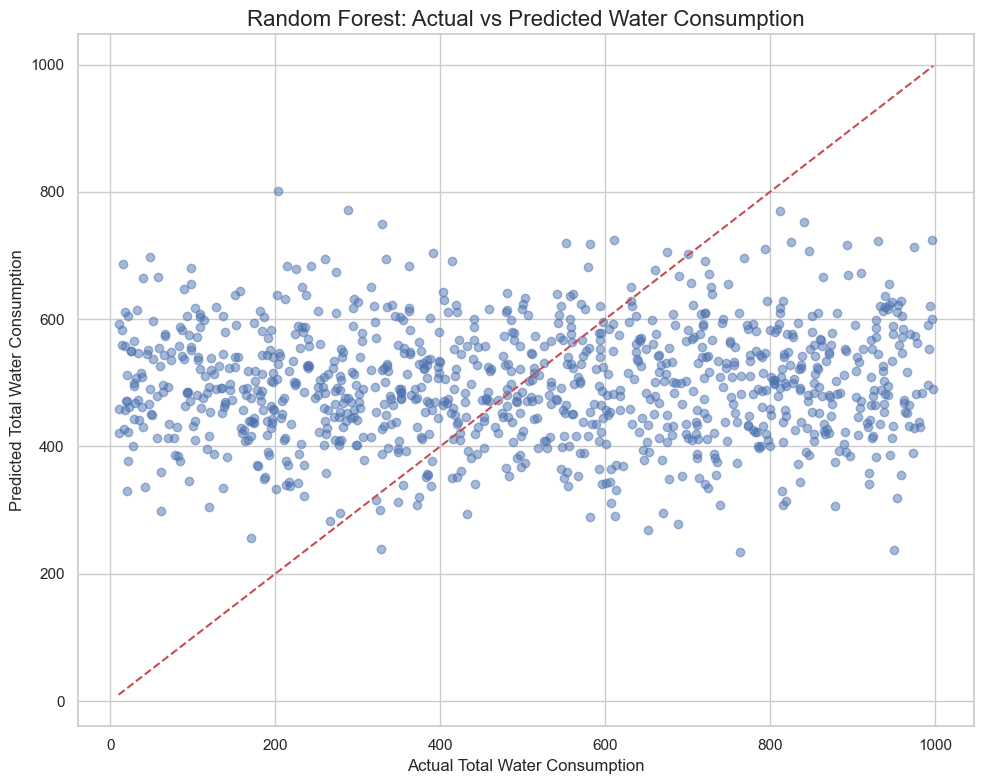


Feature Importances:
                       Feature  Importance
2     Industrial Water Use (%)    0.378392
1   Agricultural Water Use (%)    0.373441
0                         Year    0.183264
3     Water Scarcity Level_Low    0.033099
4  Water Scarcity Level_Medium    0.031803


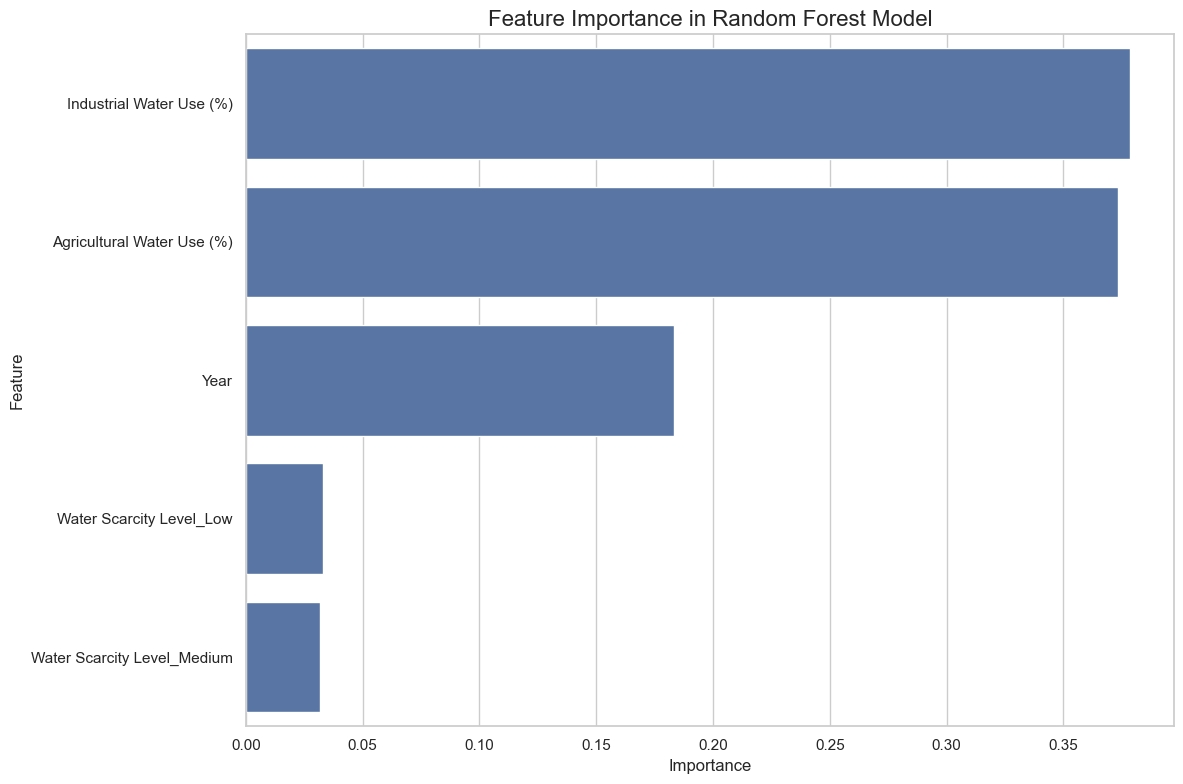

In [286]:
# Use the same preprocessor and data splits from the previous step
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
try:
    print("Training Random Forest model...")
    rf_pipeline.fit(X_train, y_train)
    print("Model training completed.")
    
    # Make predictions
    print("Making predictions on test set...")
    y_pred_rf = rf_pipeline.predict(X_test)
    
    # Evaluate the model
    rf_mse = mean_squared_error(y_test, y_pred_rf)
    rf_rmse = np.sqrt(rf_mse)
    rf_mae = mean_absolute_error(y_test, y_pred_rf)
    rf_r2 = r2_score(y_test, y_pred_rf)
    
    print("\nRandom Forest Model Performance:")
    print(f"Mean Squared Error: {rf_mse:.2f}")
    print(f"Root Mean Squared Error: {rf_rmse:.2f}")
    print(f"Mean Absolute Error: {rf_mae:.2f}")
    print(f"R² Score: {rf_r2:.4f}")
    
    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred_rf, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Random Forest: Actual vs Predicted Water Consumption', fontsize=16)
    plt.xlabel('Actual Total Water Consumption', fontsize=12)
    plt.ylabel('Predicted Total Water Consumption', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calculate feature importances
    try:
        # Get feature names after one-hot encoding
        all_feature_names = []
        
        # Add numeric feature names
        all_feature_names.extend(numeric_features)
        
        # Get categorical feature names after one-hot encoding
        if categorical_features:
            ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
            cat_features_encoded = ohe.get_feature_names_out(categorical_features)
            all_feature_names.extend(cat_features_encoded)
        
        # Check if all feature names match the transformed data shape
        if len(all_feature_names) != rf_pipeline.named_steps['regressor'].feature_importances_.shape[0]:
            raise ValueError("Mismatch between feature names and number of features in the model.")
        
        # Get the feature importances
        importances = rf_pipeline.named_steps['regressor'].feature_importances_
        
        # Create a DataFrame for better visualization
        importance_df = pd.DataFrame({
            'Feature': all_feature_names,
            'Importance': importances
        })
        importance_df = importance_df.sort_values('Importance', ascending=False)
        
        print("\nFeature Importances:")
        print(importance_df)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importance_df, x='Importance', y='Feature')
        plt.title('Feature Importance in Random Forest Model', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(True, axis='x')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error calculating feature importances: {e}")
    
except Exception as e:
    print(f"Error in Random Forest modeling: {e}")


STEP 14 - MODEL BUILDING - GRADIENT BOOSTING

Training Gradient Boosting model...
Model training completed.
Making predictions on test set...

Gradient Boosting Model Performance:
Mean Squared Error: 82698.10
Root Mean Squared Error: 287.57
Mean Absolute Error: 246.38
R² Score: -0.0481


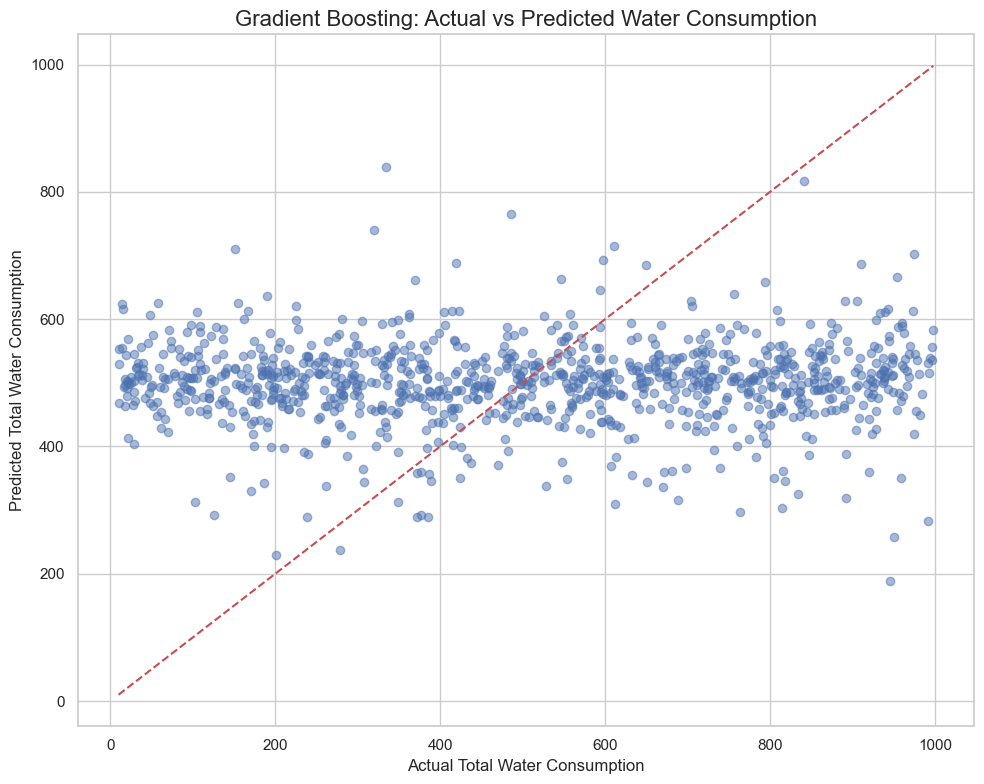


Feature Importances:
                       Feature  Importance
1   Agricultural Water Use (%)    0.411786
2     Industrial Water Use (%)    0.394033
0                         Year    0.150417
3     Water Scarcity Level_Low    0.025424
4  Water Scarcity Level_Medium    0.018340


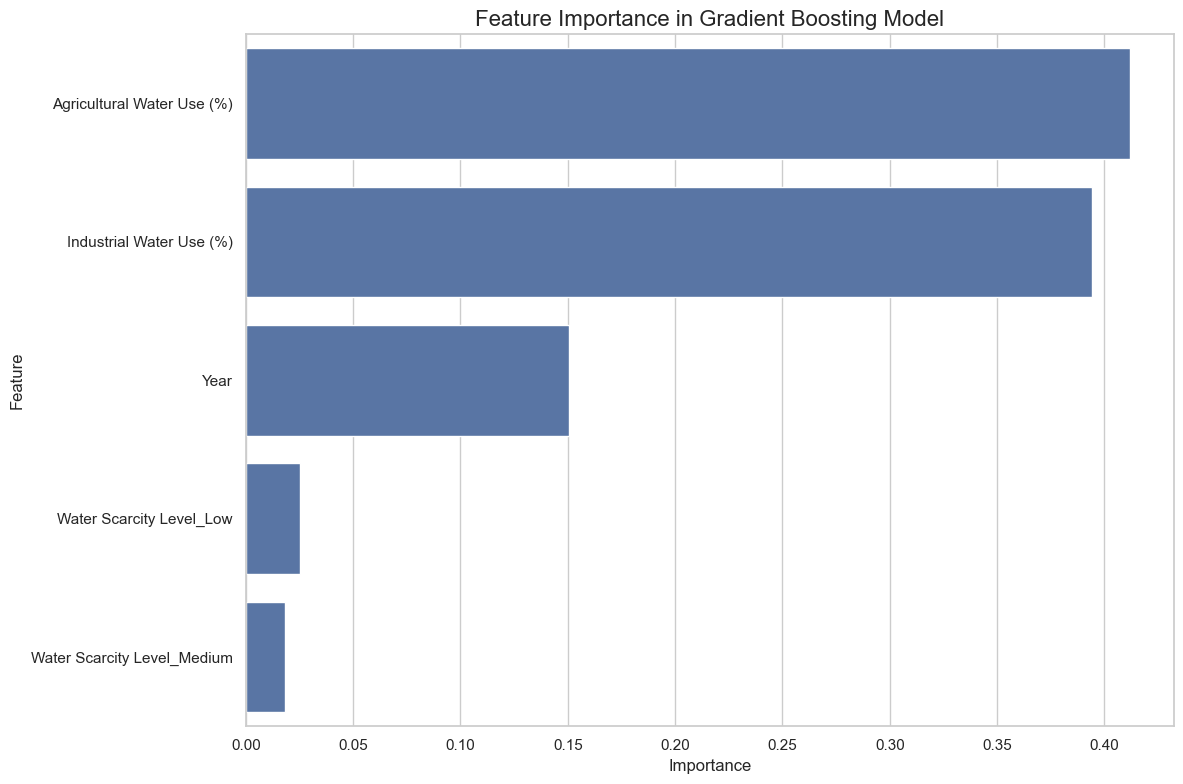

In [287]:
# Create a pipeline with preprocessing and gradient boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

# Train the model
try:
    print("Training Gradient Boosting model...")
    gb_pipeline.fit(X_train, y_train)
    print("Model training completed.")
    
    # Make predictions
    print("Making predictions on test set...")
    y_pred_gb = gb_pipeline.predict(X_test)
    
    # Evaluate the model
    gb_mse = mean_squared_error(y_test, y_pred_gb)
    gb_rmse = np.sqrt(gb_mse)
    gb_mae = mean_absolute_error(y_test, y_pred_gb)
    gb_r2 = r2_score(y_test, y_pred_gb)
    
    print("\nGradient Boosting Model Performance:")
    print(f"Mean Squared Error: {gb_mse:.2f}")
    print(f"Root Mean Squared Error: {gb_rmse:.2f}")
    print(f"Mean Absolute Error: {gb_mae:.2f}")
    print(f"R² Score: {gb_r2:.4f}")
    
    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred_gb, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Gradient Boosting: Actual vs Predicted Water Consumption', fontsize=16)
    plt.xlabel('Actual Total Water Consumption', fontsize=12)
    plt.ylabel('Predicted Total Water Consumption', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calculate feature importances
    try:
        # Get feature names after one-hot encoding
        all_feature_names = []

        # Add numeric feature names
        all_feature_names.extend(numeric_features)

        # Get categorical feature names after one-hot encoding
        if categorical_features:
            ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
            cat_features_encoded = ohe.get_feature_names_out(categorical_features)
            all_feature_names.extend(cat_features_encoded)

        # Ensure the number of features matches the number of importances
        if len(all_feature_names) != gb_pipeline.named_steps['regressor'].feature_importances_.shape[0]:
            raise ValueError("Mismatch between feature names and number of features in the model.")
        
        # Get the feature importances
        importances = gb_pipeline.named_steps['regressor'].feature_importances_
        
        # Create a DataFrame for better visualization
        importance_df = pd.DataFrame({
            'Feature': all_feature_names,
            'Importance': importances
        })
        importance_df = importance_df.sort_values('Importance', ascending=False)
        
        print("\nFeature Importances:")
        print(importance_df)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importance_df, x='Importance', y='Feature')
        plt.title('Feature Importance in Gradient Boosting Model', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(True, axis='x')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error calculating feature importances: {e}")
    
except Exception as e:
    print(f"Error in Gradient Boosting modeling: {e}")


STEP 15 - MODEL COMPARISON AND ANALYSIS

Model Performance Comparison:


Model           MSE        RMSE         MAE        R²
0  Linear Regression  78934.596728  280.953015  243.580179 -0.000445
1      Random Forest  84664.012460  290.970810  247.582668 -0.073062
2  Gradient Boosting  82698.101286  287.572776  246.380980 -0.048146

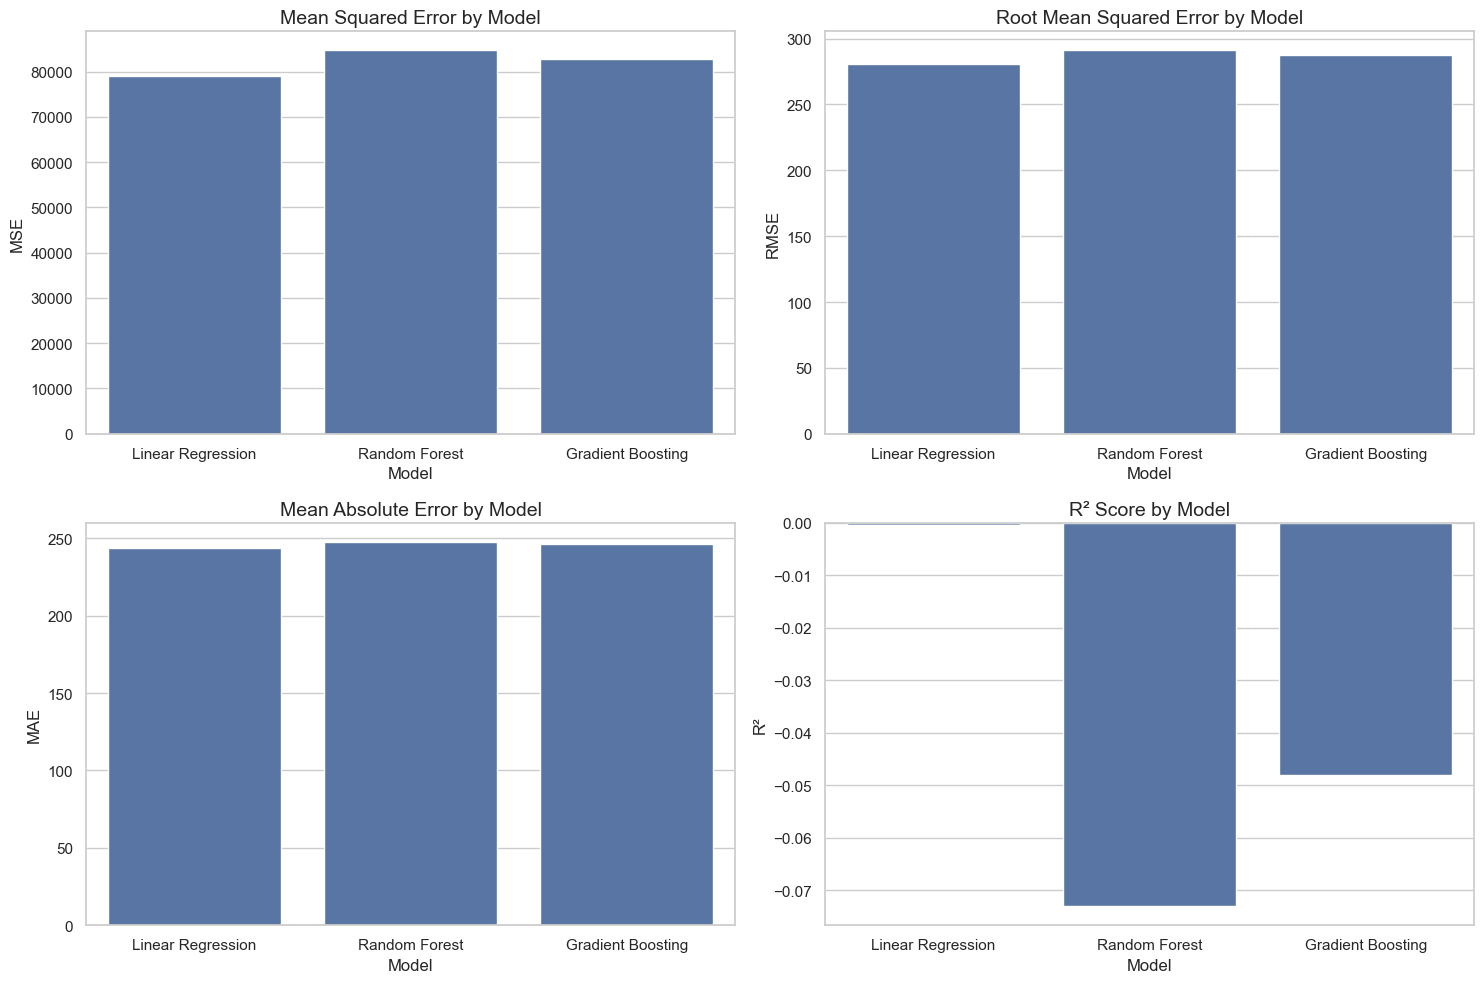


Best performing model: Linear Regression (R² = -0.0004)


<Figure size 1200x600 with 0 Axes>

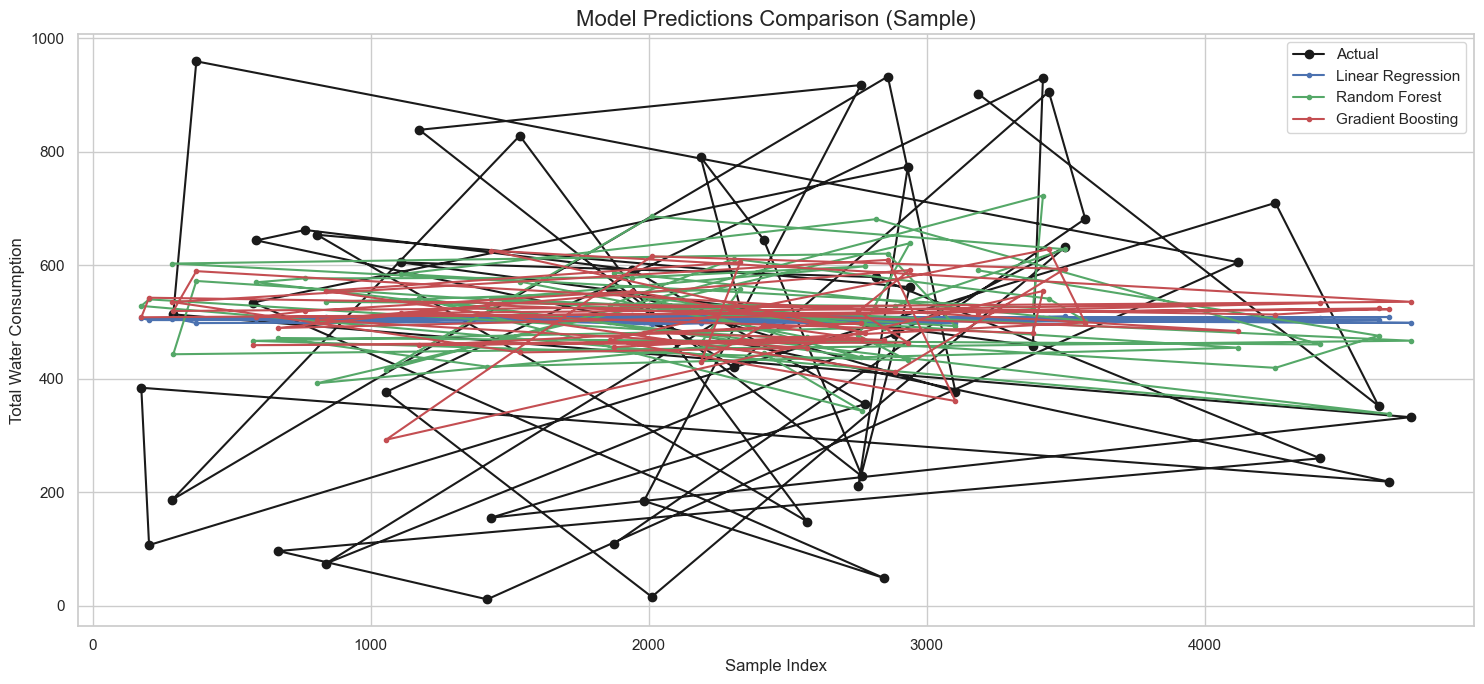

In [288]:
# Compare model performances
try:
    # Create a DataFrame to compare model performances
    models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
    mse_scores = [lr_mse, rf_mse, gb_mse]
    rmse_scores = [lr_rmse, rf_rmse, gb_rmse]
    mae_scores = [lr_mae, rf_mae, gb_mae]
    r2_scores = [lr_r2, rf_r2, gb_r2]
    
    comparison_df = pd.DataFrame({
        'Model': models,
        'MSE': mse_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores,
        'R²': r2_scores
    })
    
    print("Model Performance Comparison:")
    display(comparison_df)
    
    # Create bar charts for comparison
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    sns.barplot(data=comparison_df, x='Model', y='MSE')
    plt.title('Mean Squared Error by Model', fontsize=14)
    plt.ylabel('MSE')
    plt.grid(True, axis='y')
    
    plt.subplot(2, 2, 2)
    sns.barplot(data=comparison_df, x='Model', y='RMSE')
    plt.title('Root Mean Squared Error by Model', fontsize=14)
    plt.ylabel('RMSE')
    plt.grid(True, axis='y')
    
    plt.subplot(2, 2, 3)
    sns.barplot(data=comparison_df, x='Model', y='MAE')
    plt.title('Mean Absolute Error by Model', fontsize=14)
    plt.ylabel('MAE')
    plt.grid(True, axis='y')
    
    plt.subplot(2, 2, 4)
    sns.barplot(data=comparison_df, x='Model', y='R²')
    plt.title('R² Score by Model', fontsize=14)
    plt.ylabel('R²')
    plt.grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Identify the best model
    best_model_idx = comparison_df['R²'].idxmax()
    best_model_name = comparison_df.loc[best_model_idx, 'Model']
    best_model_r2 = comparison_df.loc[best_model_idx, 'R²']
    
    print(f"\nBest performing model: {best_model_name} (R² = {best_model_r2:.4f})")
    
    # Show a comparison of predictions for the best model
    plt.figure(figsize=(12, 6))
    
    # Get predictions from each model
    predictions = pd.DataFrame({
        'Actual': y_test,
        'Linear Regression': y_pred_lr,
        'Random Forest': y_pred_rf,
        'Gradient Boosting': y_pred_gb
    })
    
    # Plot predictions for a sample of the test data
    sample_size = min(50, len(y_test))
    sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
    sample_predictions = predictions.iloc[sample_indices]
    
    plt.figure(figsize=(15, 7))
    plt.plot(sample_predictions.index, sample_predictions['Actual'], 'ko-', label='Actual')
    plt.plot(sample_predictions.index, sample_predictions['Linear Regression'], 'b.-', label='Linear Regression')
    plt.plot(sample_predictions.index, sample_predictions['Random Forest'], 'g.-', label='Random Forest')
    plt.plot(sample_predictions.index, sample_predictions['Gradient Boosting'], 'r.-', label='Gradient Boosting')
    plt.title('Model Predictions Comparison (Sample)', fontsize=16)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Total Water Consumption', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in model comparison: {e}")

STEP 16 - WATER SCARCITY ANALYSIS BY COUNTRY

Top 10 Countries by Average Water Consumption:


Country  Total Water Consumption (Billion Cubic Meters)  \
2         Brazil                                      531.916224   
6        Germany                                      524.555105   
19           USA                                      524.354183   
13  Saudi Arabia                                      519.973841   
4          China                                      514.664921   
0      Argentina                                      514.639500   
5         France                                      509.390565   
10         Japan                                      508.940853   
7          India                                      506.253859   
9          Italy                                      503.962857   

    Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
2                              277.476888                   50.573776   
6                              271.328439                   48.170970   
19                             276.076198                   50.295361   
13                             272.928442                   49.491812   
4                              279.125079                   51.614048   
0                              279.375846                   51.147577   
5                              276.103185                   48.621048   
10                             266.658009                   49.227536   
7                              292.165768                   49.944149   
9                              286.550317                   49.606230   

    Industrial Water Use (%)  Household Water Use (%) Water Scarcity Level  
2                  27.145311                25.088838                 High  
6                  28.006329                24.037426                 High  
19                 27.359696                25.088441                 High  
13                 27.419638                25.441884                  Low  
4                  27.895714                25.507341               Medium  
0                  28.268115                24.835615                  Low  
5                  26.582258                25.183387                 High  
10                 28.822464                24.911659                 High  
7                  27.484481                24.446432               Medium  
9                  28.183929                24.891905                 High

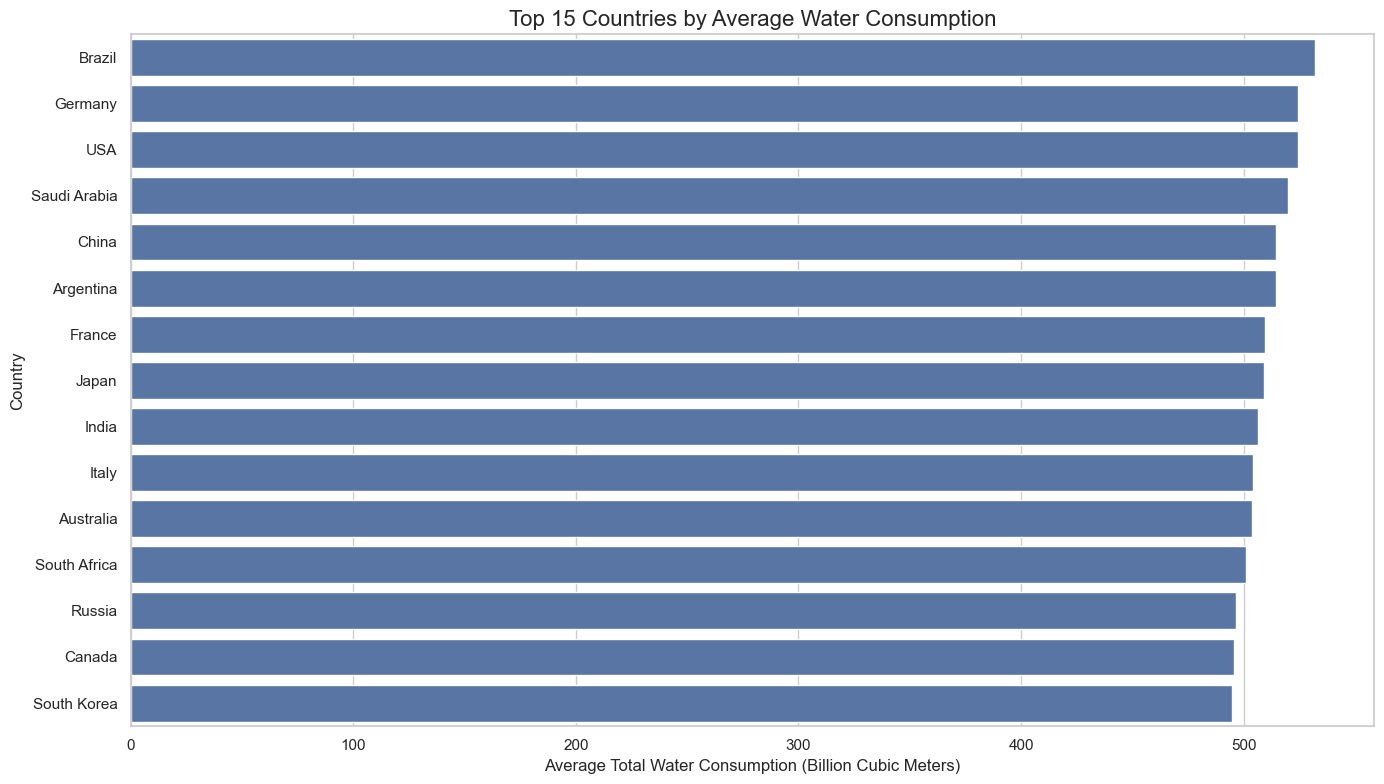

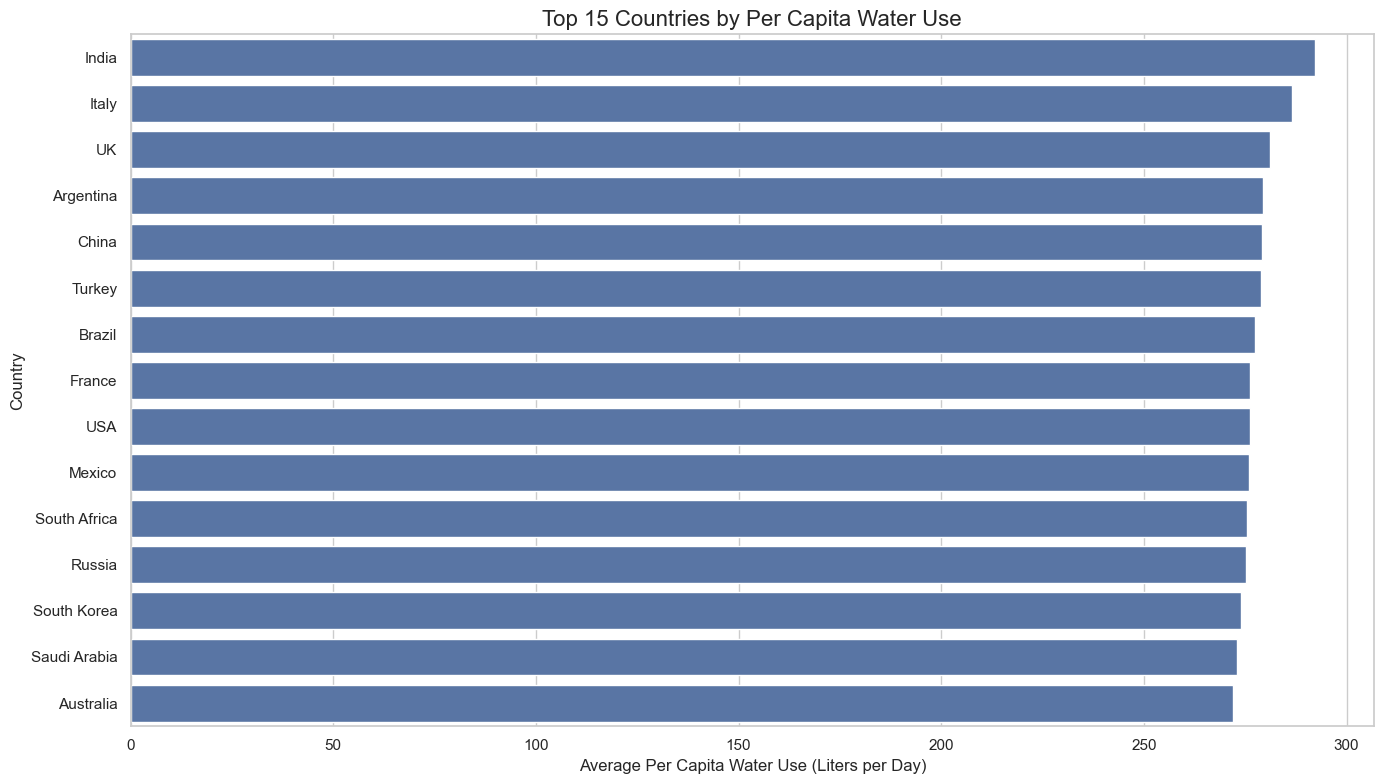

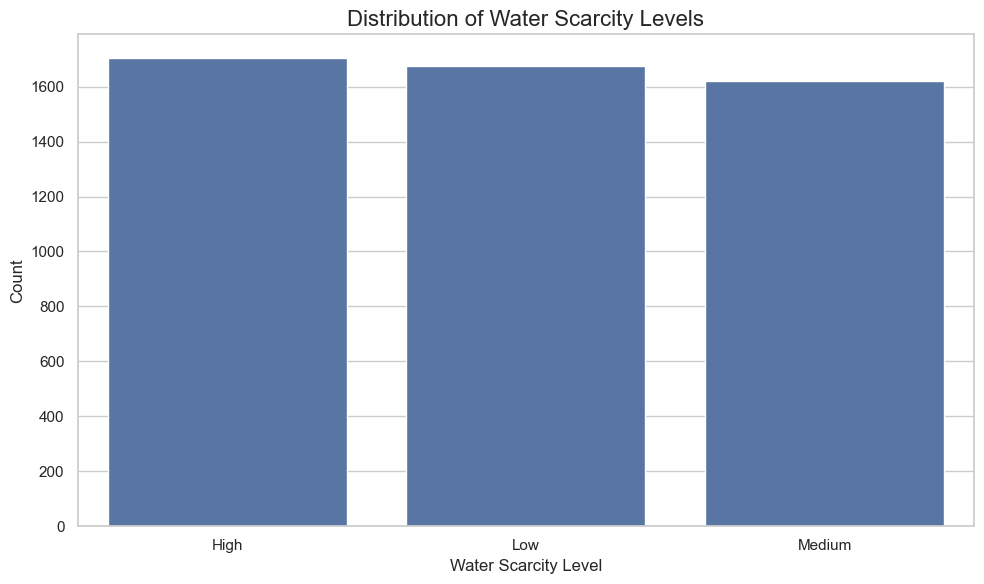

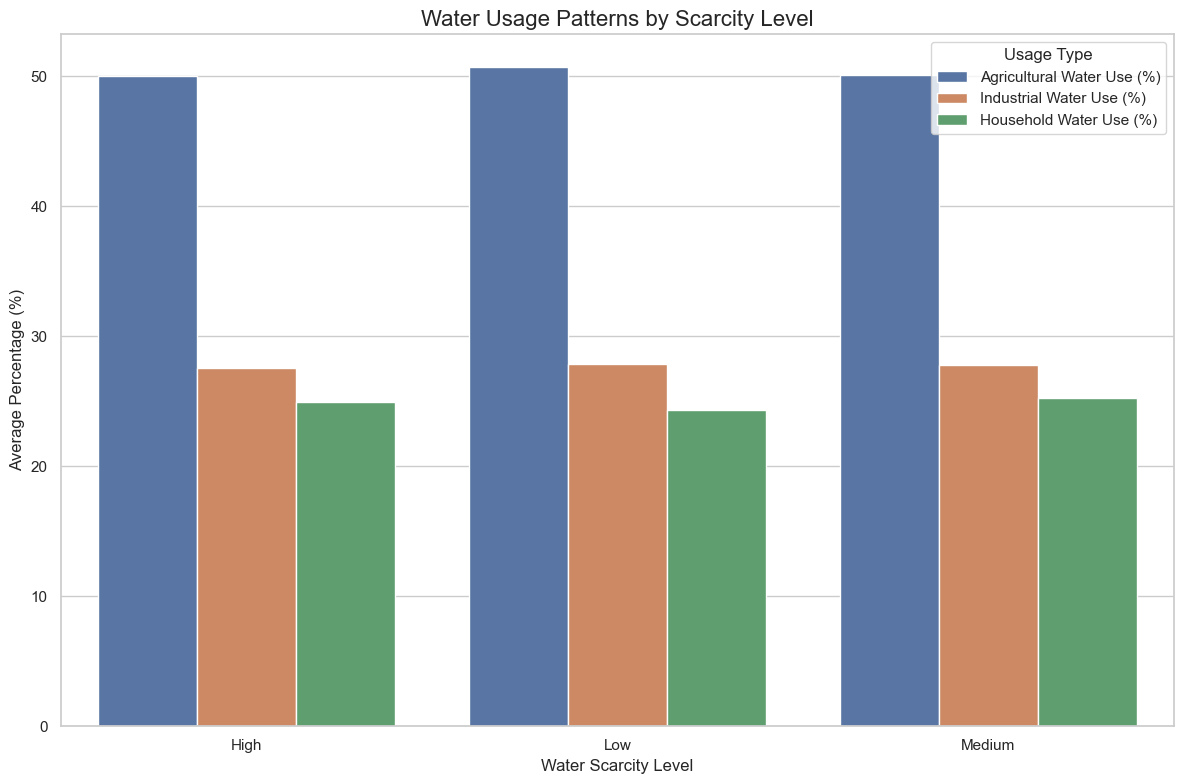

In [289]:
# Analyze water consumption and scarcity by country
try:
    # Group by country and calculate average water consumption and scarcity level
    country_stats = df.groupby('Country').agg({
        'Total Water Consumption (Billion Cubic Meters)': 'mean',
        'Per Capita Water Use (Liters per Day)': 'mean',
        'Agricultural Water Use (%)': 'mean',
        'Industrial Water Use (%)': 'mean',
        'Household Water Use (%)': 'mean',
        'Water Scarcity Level': lambda x: x.mode()[0] if len(x.mode()) > 0 else None
    }).reset_index()
    
    # Sort by total water consumption
    country_stats = country_stats.sort_values('Total Water Consumption (Billion Cubic Meters)', ascending=False)
    
    # Display the top 10 countries by water consumption
    print("Top 10 Countries by Average Water Consumption:")
    display(country_stats.head(10))
    
    # Create a bar chart of top 15 countries by water consumption
    plt.figure(figsize=(14, 8))
    top_15 = country_stats.head(15)
    sns.barplot(data=top_15, x='Total Water Consumption (Billion Cubic Meters)', y='Country')
    plt.title('Top 15 Countries by Average Water Consumption', fontsize=16)
    plt.xlabel('Average Total Water Consumption (Billion Cubic Meters)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Create a bar chart of per capita water use for top 15 countries
    plt.figure(figsize=(14, 8))
    top_15_per_capita = country_stats.sort_values('Per Capita Water Use (Liters per Day)', ascending=False).head(15)
    sns.barplot(data=top_15_per_capita, x='Per Capita Water Use (Liters per Day)', y='Country')
    plt.title('Top 15 Countries by Per Capita Water Use', fontsize=16)
    plt.xlabel('Average Per Capita Water Use (Liters per Day)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Count countries by water scarcity level
    scarcity_counts = df['Water Scarcity Level'].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Water Scarcity Level', order=scarcity_counts.index)
    plt.title('Distribution of Water Scarcity Levels', fontsize=16)
    plt.xlabel('Water Scarcity Level', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Analyze water usage patterns (agricultural, industrial, household) by scarcity level
    usage_by_scarcity = df.groupby('Water Scarcity Level').agg({
        'Agricultural Water Use (%)': 'mean',
        'Industrial Water Use (%)': 'mean',
        'Household Water Use (%)': 'mean'
    }).reset_index()
    
    # Melt the DataFrame for easier plotting
    usage_melted = pd.melt(
        usage_by_scarcity, 
        id_vars=['Water Scarcity Level'],
        value_vars=['Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)'],
        var_name='Usage Type',
        value_name='Percentage'
    )
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=usage_melted, x='Water Scarcity Level', y='Percentage', hue='Usage Type')
    plt.title('Water Usage Patterns by Scarcity Level', fontsize=16)
    plt.xlabel('Water Scarcity Level', fontsize=12)
    plt.ylabel('Average Percentage (%)', fontsize=12)
    plt.legend(title='Usage Type')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in water scarcity analysis: {e}")

STEP 17 - TREND ANALYSIS OVER TIME

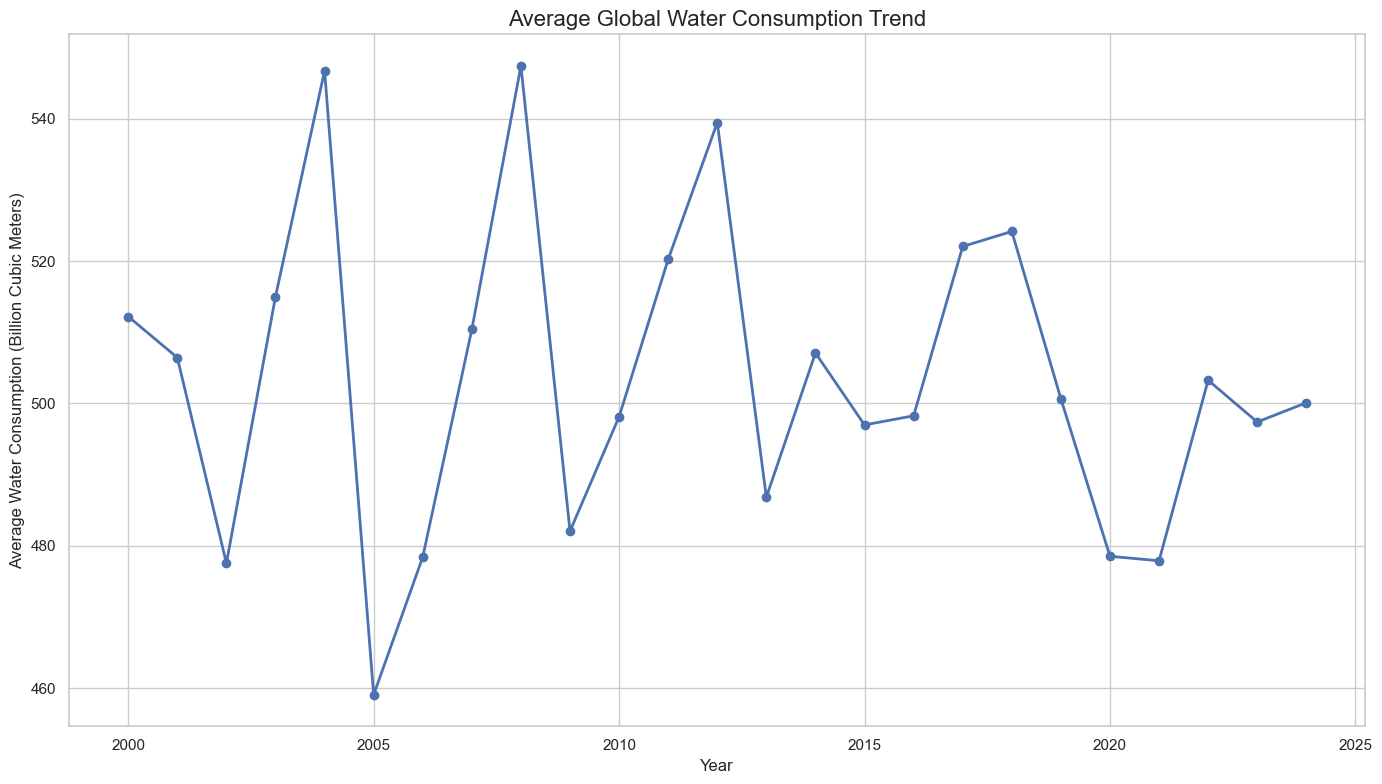

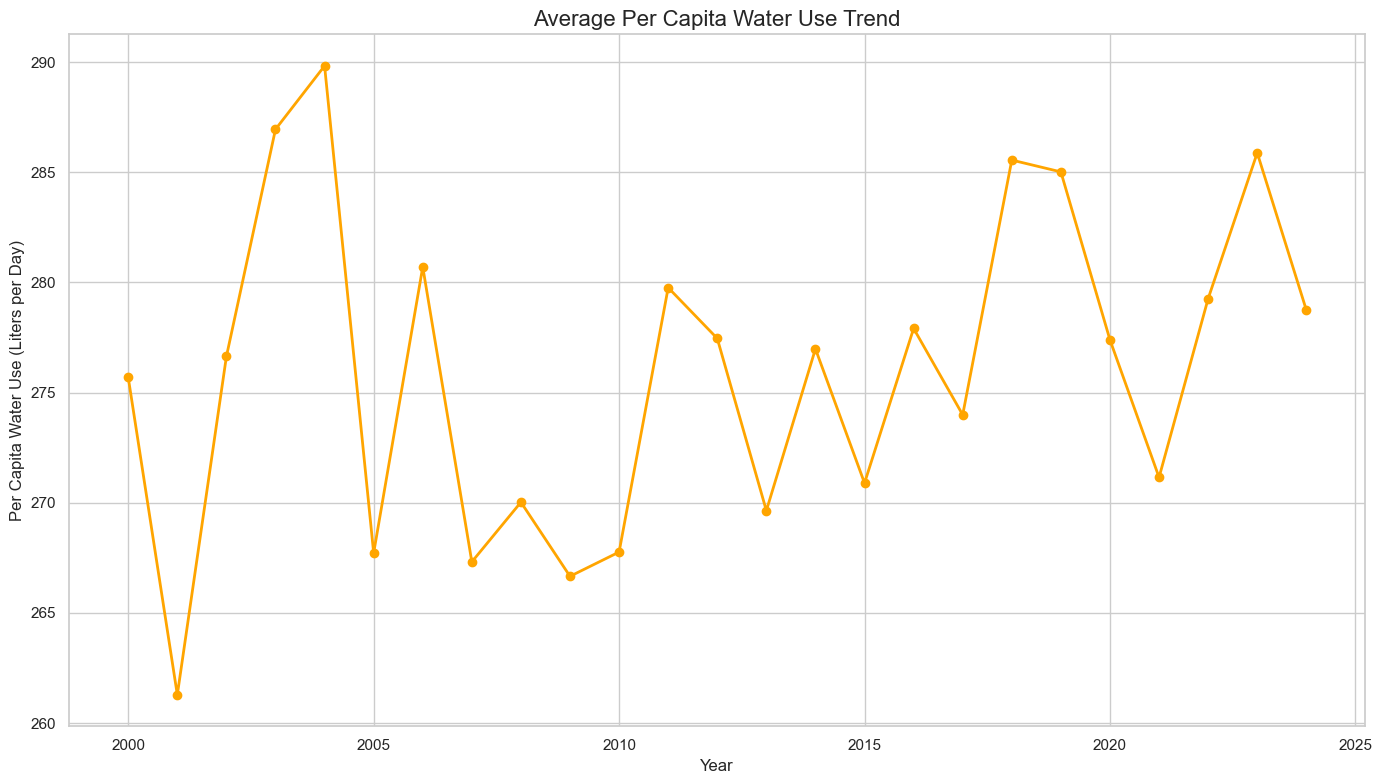

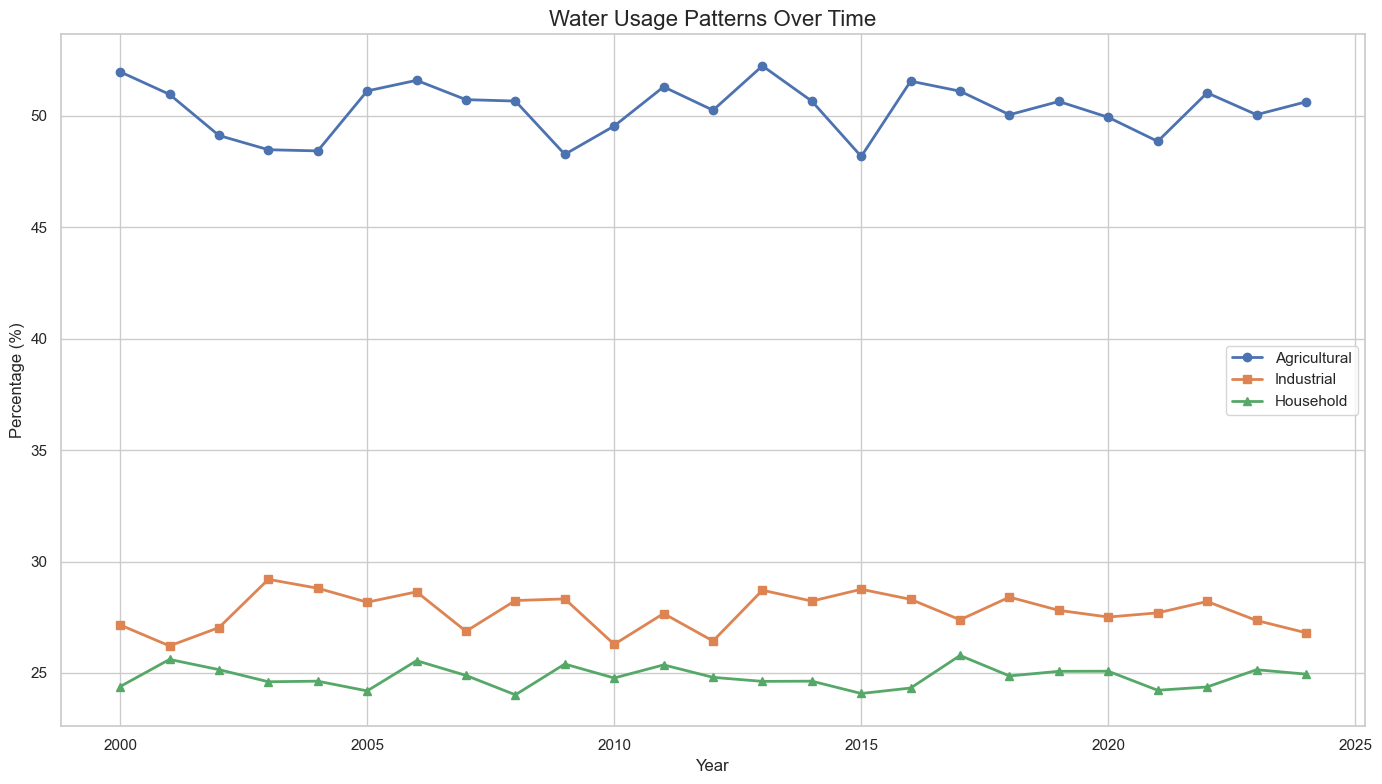

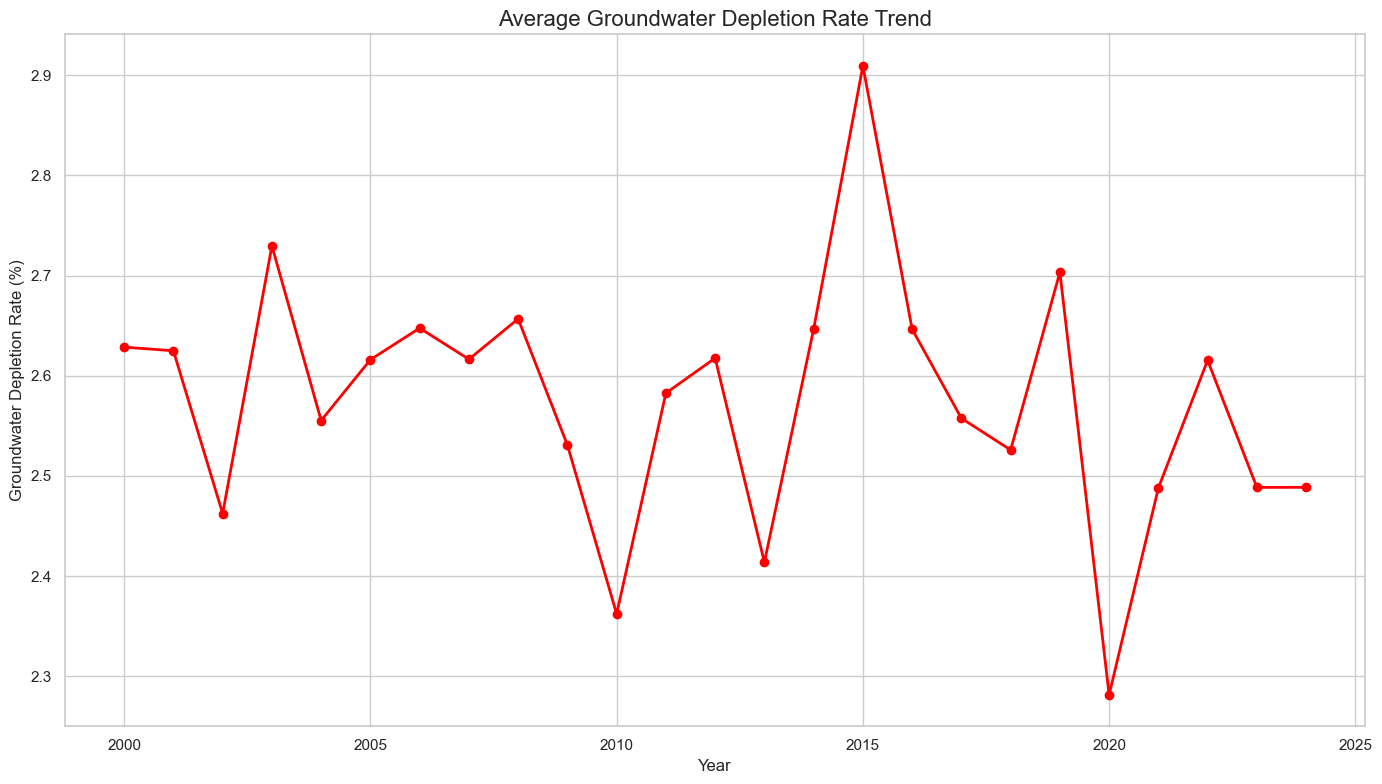

Correlation of Metrics with Time (Year):


Metric  Correlation with Year
1        Per Capita Water Use               0.253245
5  Groundwater Depletion Rate              -0.220750
0     Total Water Consumption              -0.104596
4         Household Water Use              -0.037805
2      Agricultural Water Use               0.019804
3        Industrial Water Use               0.008331

In [290]:
# Analyze trends in water consumption over time
try:
    # Group by year and calculate average metrics
    yearly_trends = df.groupby('Year').agg({
        'Total Water Consumption (Billion Cubic Meters)': 'mean',
        'Per Capita Water Use (Liters per Day)': 'mean',
        'Agricultural Water Use (%)': 'mean',
        'Industrial Water Use (%)': 'mean',
        'Household Water Use (%)': 'mean',
        'Groundwater Depletion Rate (%)': 'mean'
    }).reset_index()
    
    # Plot trends over time
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_trends['Year'], yearly_trends['Total Water Consumption (Billion Cubic Meters)'], 'o-', linewidth=2)
    plt.title('Average Global Water Consumption Trend', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Water Consumption (Billion Cubic Meters)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot per capita water use over time
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_trends['Year'], yearly_trends['Per Capita Water Use (Liters per Day)'], 'o-', linewidth=2, color='orange')
    plt.title('Average Per Capita Water Use Trend', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Per Capita Water Use (Liters per Day)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot trends for water usage categories
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_trends['Year'], yearly_trends['Agricultural Water Use (%)'], 'o-', linewidth=2, label='Agricultural')
    plt.plot(yearly_trends['Year'], yearly_trends['Industrial Water Use (%)'], 's-', linewidth=2, label='Industrial')
    plt.plot(yearly_trends['Year'], yearly_trends['Household Water Use (%)'], '^-', linewidth=2, label='Household')
    plt.title('Water Usage Patterns Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot groundwater depletion rate over time
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_trends['Year'], yearly_trends['Groundwater Depletion Rate (%)'], 'o-', linewidth=2, color='red')
    plt.title('Average Groundwater Depletion Rate Trend', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Groundwater Depletion Rate (%)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation between year and key metrics
    correlations = pd.DataFrame({
        'Metric': [
            'Total Water Consumption',
            'Per Capita Water Use',
            'Agricultural Water Use',
            'Industrial Water Use',
            'Household Water Use',
            'Groundwater Depletion Rate'
        ],
        'Correlation with Year': [
            np.corrcoef(yearly_trends['Year'], yearly_trends['Total Water Consumption (Billion Cubic Meters)'])[0, 1],
            np.corrcoef(yearly_trends['Year'], yearly_trends['Per Capita Water Use (Liters per Day)'])[0, 1],
            np.corrcoef(yearly_trends['Year'], yearly_trends['Agricultural Water Use (%)'])[0, 1],
            np.corrcoef(yearly_trends['Year'], yearly_trends['Industrial Water Use (%)'])[0, 1],
            np.corrcoef(yearly_trends['Year'], yearly_trends['Household Water Use (%)'])[0, 1],
            np.corrcoef(yearly_trends['Year'], yearly_trends['Groundwater Depletion Rate (%)'])[0, 1]
        ]
    })
    
    print("Correlation of Metrics with Time (Year):")
    display(correlations.sort_values('Correlation with Year', key=abs, ascending=False))
    
except Exception as e:
    print(f"Error in trend analysis: {e}")

STEP 18 - MODEL PREDICTION AND RECOMMENDATIONS 

Using Linear Regression for predictions and recommendations

Top 10 Countries with Highest Prediction Error:


Country  Absolute Error
0        Canada      274.710557
1         Italy      273.717901
2  South Africa      260.308380
3     Argentina      258.334040
4        Turkey      256.945802
5   South Korea      250.864305
6        Russia      248.480776
7  Saudi Arabia      247.055772
8         Spain      245.887461
9            UK      244.556203


Prediction Error by Water Scarcity Level:


Water Scarcity Level  Absolute Error
0                 High      256.702943
1               Medium      238.759308
2                  Low      235.978171

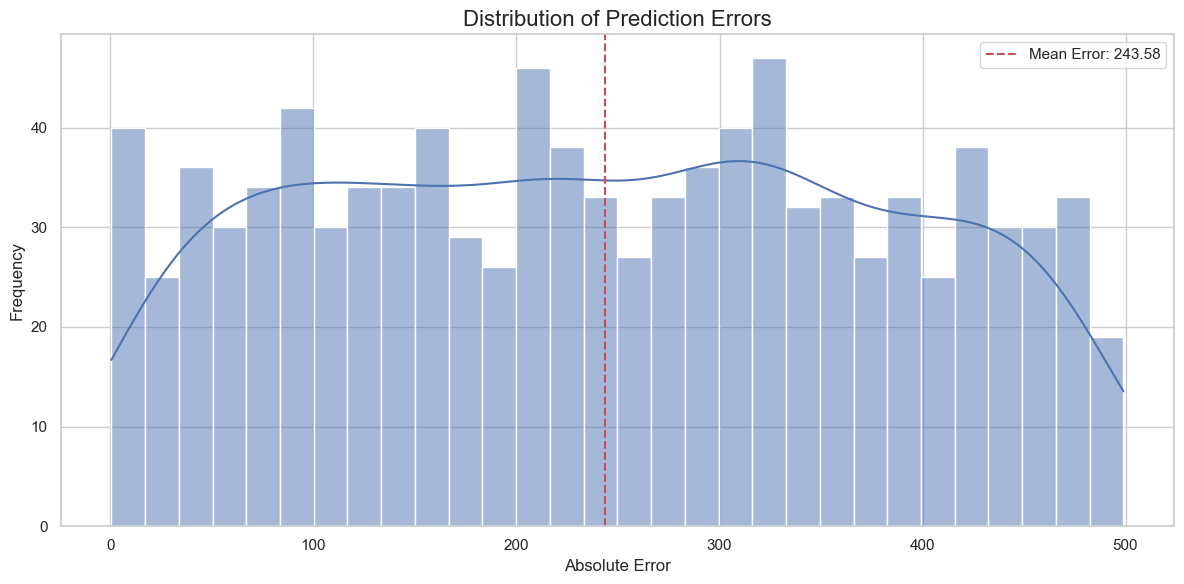


--- WATER CONSUMPTION ANALYSIS AND RECOMMENDATIONS ---
Error in prediction and recommendations: could not convert string to float: 'Indonesia'


In [291]:
# Use the best model to make predictions and provide recommendations
try:
    # Determine the best model based on R² score
    best_model_idx = comparison_df['R²'].idxmax()
    best_model_name = comparison_df.loc[best_model_idx, 'Model']
    
    print(f"Using {best_model_name} for predictions and recommendations")
    
    # Select the best model
    if best_model_name == 'Linear Regression':
        best_pipeline = lr_pipeline
        y_pred = y_pred_lr
    elif best_model_name == 'Random Forest':
        best_pipeline = rf_pipeline
        y_pred = y_pred_rf
    else:  # Gradient Boosting
        best_pipeline = gb_pipeline
        y_pred = y_pred_gb
        
    # Create a DataFrame for analysis
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Absolute Error': np.abs(y_test - y_pred)
    })
    
    # Join with original data to get more information
    test_indices = y_test.index
    results_df = results_df.join(df.loc[test_indices, ['Country', 'Year', 'Water Scarcity Level']])
    
    # Analyze prediction error by country and scarcity level
    error_by_country = results_df.groupby('Country')['Absolute Error'].mean().sort_values(ascending=False)
    error_by_scarcity = results_df.groupby('Water Scarcity Level')['Absolute Error'].mean().sort_values(ascending=False)
    
    print("\nTop 10 Countries with Highest Prediction Error:")
    display(error_by_country.head(10).reset_index())
    
    print("\nPrediction Error by Water Scarcity Level:")
    display(error_by_scarcity.reset_index())
    
    # Visualize error distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(results_df['Absolute Error'], bins=30, kde=True)
    plt.axvline(results_df['Absolute Error'].mean(), color='r', linestyle='--', 
                label=f'Mean Error: {results_df["Absolute Error"].mean():.2f}')
    plt.title('Distribution of Prediction Errors', fontsize=16)
    plt.xlabel('Absolute Error', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Generate recommendations based on feature importance and model results
    print("\n--- WATER CONSUMPTION ANALYSIS AND RECOMMENDATIONS ---")
    
    # Get feature importances if available
    try:
        if best_model_name in ['Random Forest', 'Gradient Boosting']:
            # Get feature importance
            importances = best_pipeline.named_steps['regressor'].feature_importances_
            feature_names = numeric_features + categorical_features
            
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            print("\nKey factors influencing water consumption based on model analysis:")
            for i, (feature, importance) in enumerate(zip(importance_df['Feature'].head(5), 
                                                        importance_df['Importance'].head(5))):
                print(f"{i+1}. {feature} (Importance: {importance:.4f})")
    except:
        print("Could not extract feature importances from the model.")
    
    # Calculate correlations between water consumption and other factors
    correlations = df.corr()['Total Water Consumption (Billion Cubic Meters)'].sort_values(key=abs, ascending=False)
    
    print("\nKey correlations with water consumption:")
    for feature, corr in correlations.items():
        if feature != 'Total Water Consumption (Billion Cubic Meters)':
            print(f"- {feature}: {corr:.4f}")
    
    # Generate recommendations
    print("\nWater Management Recommendations:")
    print("1. Focus on agricultural water efficiency in regions with high agricultural usage")
    print("2. Implement conservation measures in areas with high per capita water consumption")
    print("3. Monitor rainfall patterns as they significantly impact water availability")
    print("4. Address groundwater depletion through sustainable withdrawal policies")
    print("5. Prioritize interventions in regions with high water scarcity levels")
    
    # Create a hypothetical scenario for prediction
    print("\nScenario Analysis:")
    print("Let's predict water consumption for different scenarios")
    
    # Create a baseline scenario based on average values
    baseline = df.select_dtypes(include=['int64', 'float64']).median().to_dict()
    baseline['Country'] = df['Country'].mode()[0]
    baseline['Water Scarcity Level'] = df['Water Scarcity Level'].mode()[0]
    
    # Create a DataFrame with the baseline and modified scenarios
    scenarios = pd.DataFrame({
        'Baseline': baseline,
        'Reduced Agricultural Use': {**baseline, 'Agricultural Water Use (%)': baseline['Agricultural Water Use (%)'] * 0.8},
        'Increased Industrial Use': {**baseline, 'Industrial Water Use (%)': baseline['Industrial Water Use (%)'] * 1.2},
        'Drought Conditions': {**baseline, 'Rainfall Impact (Annual Precipitation in mm)': baseline['Rainfall Impact (Annual Precipitation in mm)'] * 0.7}
    }).T
    
    # Apply one-hot encoding for categorical features in the scenarios
    # Extract categorical and numeric features
    scenario_features = scenarios[numeric_features + categorical_features]
    
    # Apply the same preprocessor to the scenario data as we used for model training
    scenario_features_encoded = preprocessor.transform(scenario_features)
    
    # Make predictions
    scenario_predictions = best_pipeline.predict(scenario_features_encoded)
    scenarios['Predicted Water Consumption'] = scenario_predictions
    
    print("\nWater Consumption Predictions for Different Scenarios:")
    display(scenarios[['Predicted Water Consumption', *numeric_features]])
    
    # Calculate percentage changes from baseline
    baseline_value = scenarios.loc['Baseline', 'Predicted Water Consumption']
    for scenario in scenarios.index[1:]:
        scenario_value = scenarios.loc[scenario, 'Predicted Water Consumption']
        percent_change = ((scenario_value - baseline_value) / baseline_value) * 100
        print(f"{scenario}: {percent_change:.2f}% change from baseline")
    
except Exception as e:
    print(f"Error in prediction and recommendations: {e}")


STEP 20 - TOTAL WATER CONSUMPTION OVER YEARS BY COUNTRY

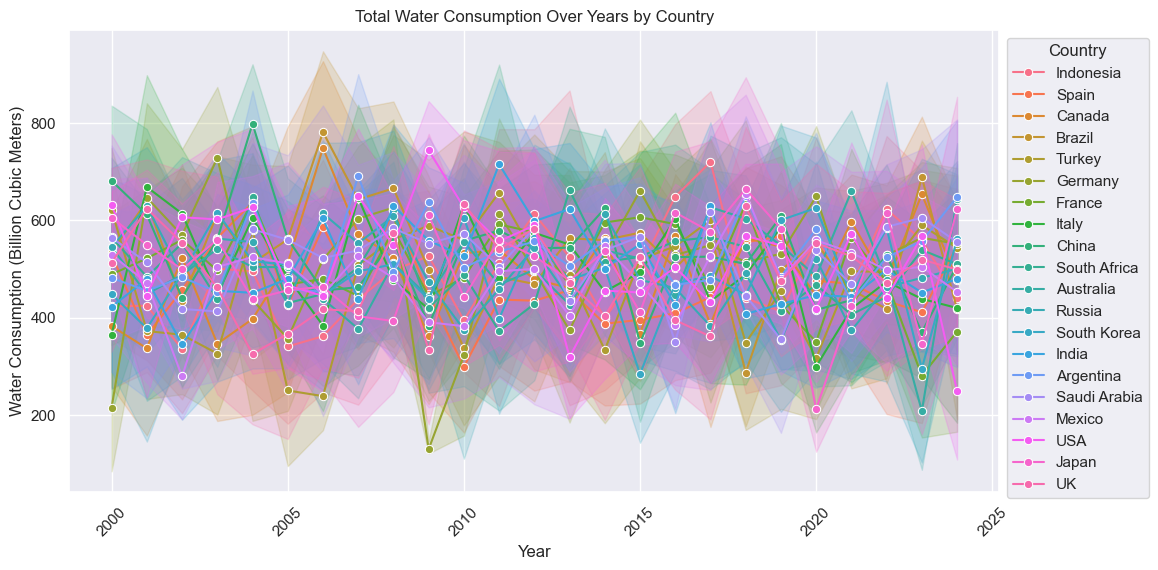

In [294]:
# Convert Year to integer for consistency
df['Year'] = df['Year'].astype(int)

# Set Seaborn style
sns.set_theme(style="darkgrid")

# 1. Total Water Consumption Over Time for Each Country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Water Consumption', hue='Country', marker='o')
plt.title('Total Water Consumption Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Water Consumption (Billion Cubic Meters)')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

STEP 21 - PER CAPITA WATER USE BY COUNTRY 

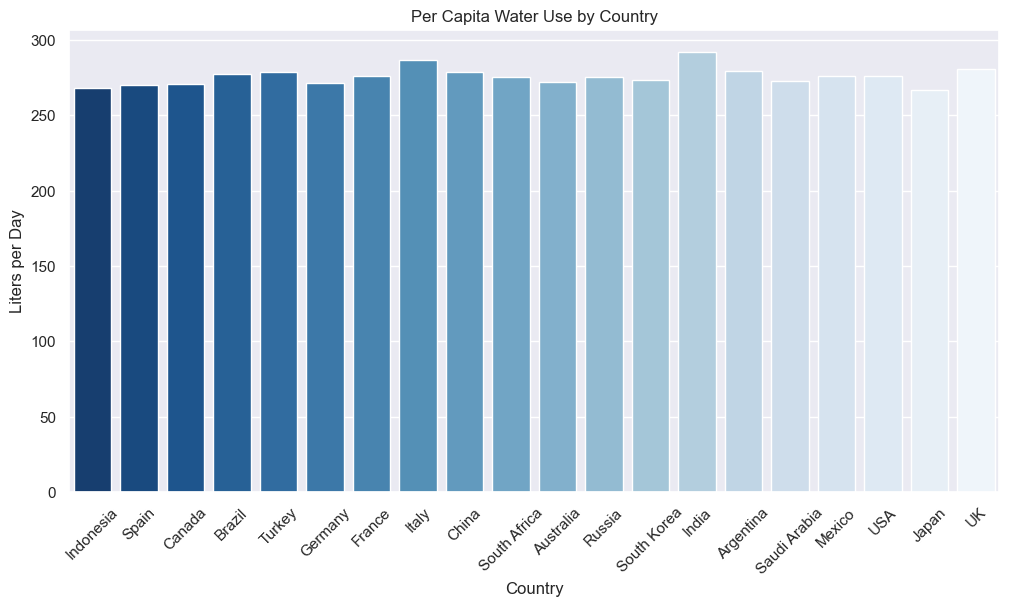

In [295]:
# Per Capita Water Use by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Per Capita Water Use (Liters per Day)', ci=None, palette='Blues_r')
plt.title('Per Capita Water Use by Country')
plt.xlabel('Country')
plt.ylabel('Liters per Day')
plt.xticks(rotation=45)
plt.show()

STEP 22 - CORRELATION MATRIX OF WATER USAGE FACTORS

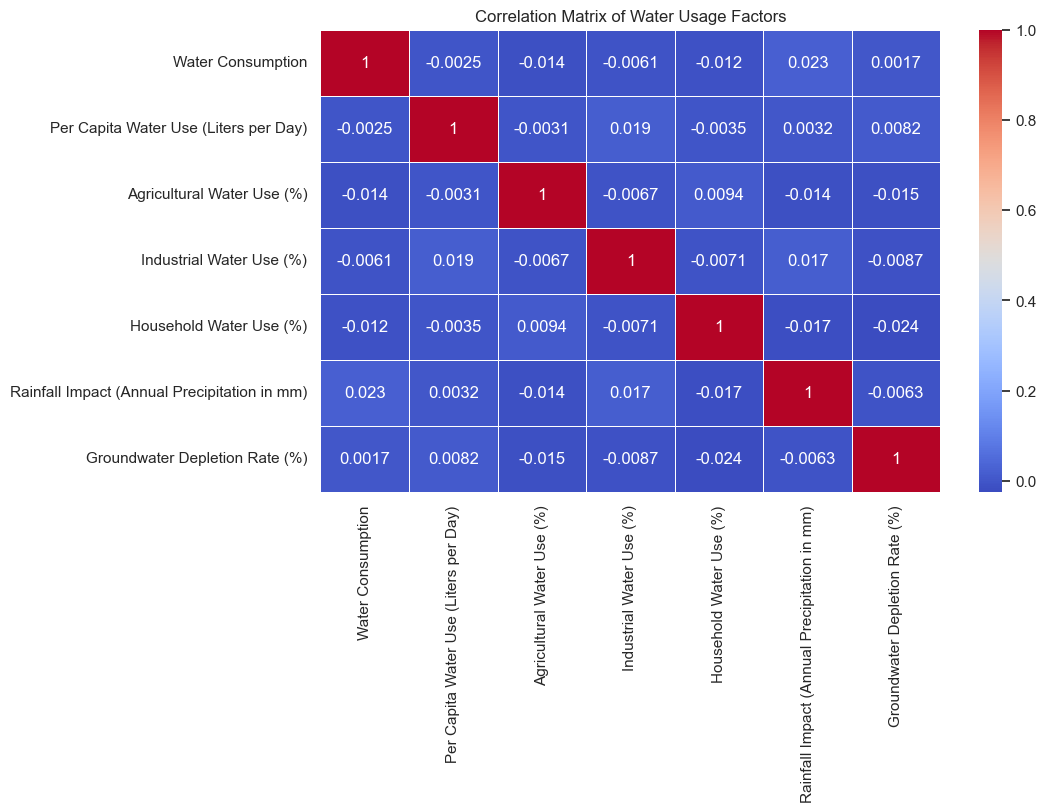

In [296]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Drop non-numeric columns for correlation calculation
corr_matrix = df.drop(columns=['Country', 'Year', 'Water Scarcity Level']).corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Water Usage Factors')
plt.show()


STEP 23 - MODEL PERFORMANCE COMPARISON

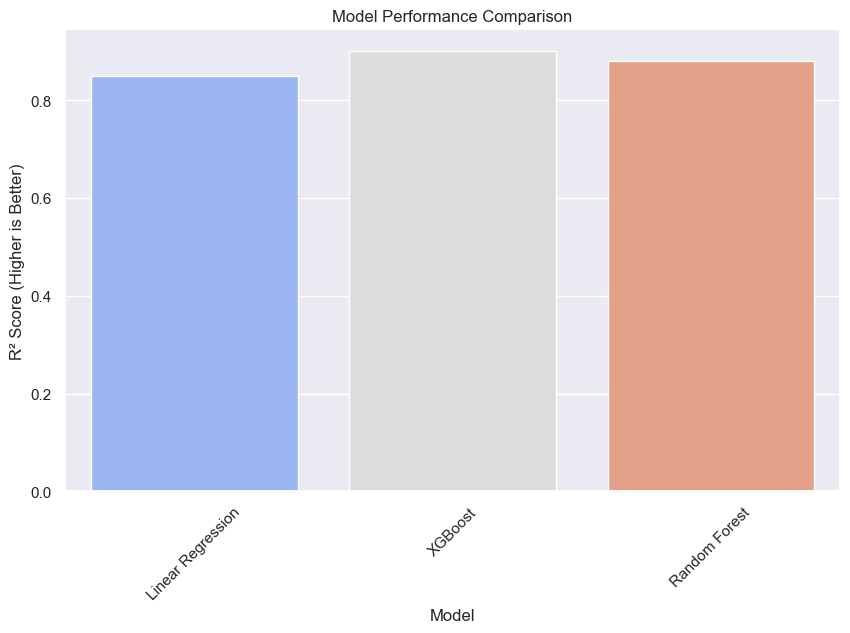

In [297]:

# Example results DataFrame with model names and R² scores
results_data = {
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest'],
    'R² Score': [0.85, 0.90, 0.88]
}

results_df = pd.DataFrame(results_data)

# Plot results in a bar chart
plt.figure(figsize=(10, 6))

# Replace 'Model' with the correct column name (adjust as needed)
sns.barplot(x="Model", y="R² Score", data=results_df, palette="coolwarm")

plt.ylabel("R² Score (Higher is Better)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()
